In [6]:
#-*- coding: utf-8 -*-

from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
def load_images(path, size=(512,512)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)

In [3]:
path = 'undersampling/'

In [10]:
dataA_all = load_images(path + 'trainA/undersampled_original/')
# dataA_all = load_images('C:/Users/owner/deblurring/datasets/DatasetName/trainB/')
print('Loaded dataA: ', dataA_all.shape)

Loaded dataA:  (2816, 512, 512, 3)


In [16]:
import cv2
from sklearn.utils import resample



In [22]:
#To get a subset of all images, for faster training during demonstration
dataA = resample(dataA_all, 
                 replace=False,
                 n_samples=500,
                 random_state=42) 

In [13]:
dataB_all = load_images(path + 'trainB/')
# dataB_all = load_images('C:/Users/owner/deblurring/datasets/DatasetName/trainA/')
print('Loaded dataB: ', dataB_all.shape)
#Get a subset of all images, for faster training during demonstration
#We could have just read the list of files and only load a subset, better memory management. 


Loaded dataB:  (1784, 512, 512, 3)


In [23]:
dataB = resample(dataB_all, 
                 replace=False,
                 n_samples=500,
                 random_state=42) 

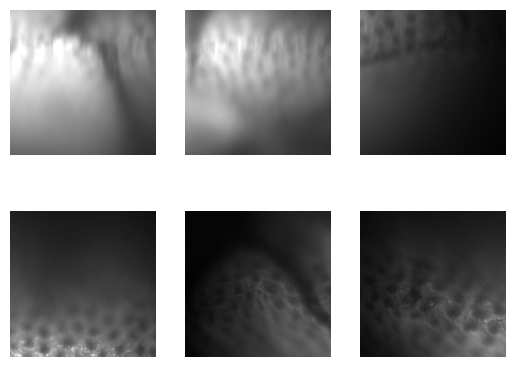

In [24]:
n_samples = 3
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + i)
	plt.axis('off')
	plt.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + n_samples + i)
	plt.axis('off')
	plt.imshow(dataB[i].astype('uint16'))
plt.show()

In [25]:
data = [dataA, dataB]

print('Loaded', data[0].shape, data[1].shape)



Loaded (500, 512, 512, 3) (500, 512, 512, 3)


In [3]:
#Preprocess data to change input range to values between -1 and 1
# This is because the generator uses tanh activation in the output layer
#And tanh ranges between -1 and 1
def preprocess_data(data):
	# load compressed arrays
	# unpack arrays
	X1, X2 = data[0], data[1]
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [4]:
dataset = preprocess_data(data)

NameError: name 'data' is not defined

In [5]:
from cycleGAN_model import define_generator, define_discriminator, define_composite_model, train


# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)

NameError: name 'dataset' is not defined

In [21]:
from datetime import datetime 
start1 = datetime.now() 


In [30]:
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset, epochs=100)

Iteration>1, dA[1.556,0.666] dB[1.999,0.726] g[19.621,21.631]
Iteration>2, dA[10.262,1.296] dB[4.672,1.219] g[19.017,19.199]
Iteration>3, dA[2.022,0.555] dB[22.502,2.488] g[28.213,19.032]
Iteration>4, dA[5.546,1.630] dB[1.637,2.736] g[15.929,18.162]
Iteration>5, dA[4.291,4.093] dB[0.728,5.142] g[18.317,18.133]
Iteration>6, dA[4.642,4.504] dB[1.145,1.782] g[17.297,19.100]
Iteration>7, dA[2.053,2.249] dB[0.922,1.110] g[15.847,16.356]
Iteration>8, dA[0.343,0.781] dB[0.653,0.440] g[11.860,12.408]
Iteration>9, dA[0.266,0.299] dB[0.251,0.290] g[13.730,13.336]
Iteration>10, dA[0.289,0.247] dB[0.298,0.355] g[9.562,10.011]
Iteration>11, dA[0.212,0.247] dB[0.711,0.602] g[14.791,15.258]
Iteration>12, dA[0.134,0.181] dB[0.543,0.863] g[13.727,13.113]
Iteration>13, dA[0.319,0.261] dB[0.225,0.602] g[9.728,10.524]
Iteration>14, dA[0.191,0.263] dB[0.520,0.477] g[12.231,12.505]
Iteration>15, dA[0.142,0.238] dB[0.215,0.269] g[9.173,9.028]
Iteration>16, dA[0.270,0.244] dB[0.341,0.315] g[15.531,15.653]
Ite

Iteration>133, dA[0.085,0.082] dB[0.114,0.094] g[8.806,9.967]
Iteration>134, dA[0.070,0.137] dB[0.032,0.037] g[16.631,16.797]
Iteration>135, dA[0.153,0.088] dB[0.052,0.048] g[10.411,8.699]
Iteration>136, dA[0.052,0.095] dB[0.060,0.049] g[15.743,16.440]
Iteration>137, dA[0.045,0.099] dB[0.064,0.019] g[11.976,13.541]
Iteration>138, dA[0.088,0.049] dB[0.045,0.048] g[11.075,12.671]
Iteration>139, dA[0.106,0.055] dB[0.102,0.126] g[7.715,9.493]
Iteration>140, dA[0.114,0.122] dB[0.102,0.095] g[7.250,9.433]
Iteration>141, dA[0.029,0.036] dB[0.045,0.078] g[12.784,13.885]
Iteration>142, dA[0.016,0.034] dB[0.201,0.042] g[11.634,13.654]
Iteration>143, dA[0.091,0.075] dB[0.123,0.131] g[8.397,8.709]
Iteration>144, dA[0.017,0.076] dB[0.209,0.343] g[14.744,13.866]
Iteration>145, dA[0.104,0.082] dB[0.185,0.516] g[14.514,14.191]
Iteration>146, dA[0.017,0.160] dB[0.172,0.139] g[13.514,14.077]
Iteration>147, dA[0.061,0.039] dB[0.318,0.382] g[6.445,8.108]
Iteration>148, dA[0.120,0.110] dB[0.117,0.377] g[12

Iteration>263, dA[0.078,0.090] dB[0.051,0.024] g[16.495,16.126]
Iteration>264, dA[0.134,0.078] dB[0.055,0.040] g[8.023,8.183]
Iteration>265, dA[0.047,0.035] dB[0.067,0.063] g[11.706,12.327]
Iteration>266, dA[0.195,0.079] dB[0.283,0.116] g[4.854,5.601]
Iteration>267, dA[0.093,0.168] dB[0.050,0.117] g[7.036,8.177]
Iteration>268, dA[0.132,0.067] dB[0.031,0.103] g[9.611,12.783]
Iteration>269, dA[0.077,0.060] dB[0.205,0.054] g[5.639,5.896]
Iteration>270, dA[0.067,0.133] dB[0.014,0.092] g[8.602,8.013]
Iteration>271, dA[0.016,0.070] dB[0.074,0.038] g[11.368,13.100]
Iteration>272, dA[0.143,0.032] dB[0.165,0.077] g[12.437,11.218]
Iteration>273, dA[0.057,0.057] dB[0.052,0.060] g[9.710,13.354]
Iteration>274, dA[0.076,0.049] dB[0.026,0.024] g[11.101,11.777]
Iteration>275, dA[0.094,0.038] dB[0.272,0.143] g[8.739,10.273]
Iteration>276, dA[0.098,0.023] dB[0.015,0.035] g[11.772,12.836]
Iteration>277, dA[0.042,0.037] dB[0.018,0.085] g[12.413,12.854]
Iteration>278, dA[0.333,0.099] dB[0.069,0.048] g[9.79

Iteration>393, dA[0.016,0.033] dB[0.014,0.032] g[12.368,13.201]
Iteration>394, dA[0.075,0.047] dB[0.199,0.028] g[6.116,6.724]
Iteration>395, dA[0.047,0.038] dB[0.026,0.092] g[9.974,9.383]
Iteration>396, dA[0.045,0.064] dB[0.180,0.124] g[7.789,12.700]
Iteration>397, dA[0.110,0.046] dB[0.008,0.082] g[9.772,12.035]
Iteration>398, dA[0.073,0.050] dB[0.019,0.051] g[12.770,12.755]
Iteration>399, dA[0.067,0.055] dB[0.033,0.036] g[13.415,14.778]
Iteration>400, dA[0.199,0.104] dB[0.013,0.014] g[12.961,12.349]
Iteration>401, dA[0.023,0.037] dB[0.007,0.004] g[9.684,9.738]
Iteration>402, dA[0.049,0.063] dB[0.005,0.011] g[12.634,12.075]
Iteration>403, dA[0.102,0.041] dB[0.135,0.047] g[10.139,10.829]
Iteration>404, dA[0.028,0.017] dB[0.049,0.043] g[16.234,15.455]
Iteration>405, dA[0.025,0.014] dB[0.061,0.062] g[10.675,11.014]
Iteration>406, dA[0.020,0.044] dB[0.053,0.015] g[13.689,13.590]
Iteration>407, dA[0.035,0.018] dB[0.048,0.032] g[10.730,11.221]
Iteration>408, dA[0.056,0.020] dB[0.017,0.039] g

Iteration>522, dA[0.094,0.059] dB[0.012,0.055] g[11.176,9.812]
Iteration>523, dA[0.053,0.039] dB[0.048,0.052] g[10.912,11.468]
Iteration>524, dA[0.414,0.104] dB[0.031,0.021] g[10.875,8.928]
Iteration>525, dA[0.063,0.183] dB[0.078,0.047] g[14.953,13.761]
Iteration>526, dA[0.067,0.035] dB[0.012,0.027] g[9.969,10.540]
Iteration>527, dA[0.238,0.060] dB[0.011,0.010] g[11.620,9.920]
Iteration>528, dA[0.012,0.182] dB[0.019,0.028] g[12.746,14.469]
Iteration>529, dA[0.056,0.020] dB[0.017,0.035] g[12.386,13.956]
Iteration>530, dA[0.054,0.047] dB[0.009,0.100] g[8.624,9.252]
Iteration>531, dA[0.073,0.060] dB[0.148,0.061] g[8.397,9.717]
Iteration>532, dA[0.015,0.033] dB[0.029,0.016] g[14.401,13.851]
Iteration>533, dA[0.012,0.017] dB[0.162,0.063] g[9.038,10.706]
Iteration>534, dA[0.032,0.025] dB[0.034,0.139] g[14.564,14.077]
Iteration>535, dA[0.008,0.013] dB[0.059,0.030] g[8.293,10.454]
Iteration>536, dA[0.009,0.033] dB[0.141,0.054] g[10.364,12.066]
Iteration>537, dA[0.011,0.063] dB[0.021,0.089] g[6

Iteration>653, dA[0.158,0.055] dB[0.114,0.076] g[4.040,4.347]
Iteration>654, dA[0.025,0.158] dB[0.007,0.075] g[7.959,10.165]
Iteration>655, dA[0.144,0.035] dB[0.135,0.037] g[8.423,9.196]
Iteration>656, dA[0.055,0.031] dB[0.038,0.011] g[10.739,10.573]
Iteration>657, dA[0.093,0.103] dB[0.044,0.019] g[6.091,5.617]
Iteration>658, dA[0.045,0.013] dB[0.045,0.094] g[13.330,11.411]
Iteration>659, dA[0.075,0.117] dB[0.094,0.097] g[8.585,6.822]
Iteration>660, dA[0.027,0.033] dB[0.060,0.033] g[13.117,14.826]
Iteration>661, dA[0.029,0.019] dB[0.019,0.023] g[15.500,14.187]
Iteration>662, dA[0.067,0.035] dB[0.034,0.030] g[9.313,8.347]
Iteration>663, dA[0.047,0.029] dB[0.150,0.034] g[5.742,4.916]
Iteration>664, dA[0.033,0.060] dB[0.017,0.166] g[5.847,7.288]
Iteration>665, dA[0.009,0.018] dB[0.039,0.018] g[9.115,10.864]
Iteration>666, dA[0.136,0.031] dB[0.387,0.077] g[4.630,4.789]
Iteration>667, dA[0.027,0.056] dB[0.029,0.120] g[4.357,4.601]
Iteration>668, dA[0.027,0.010] dB[0.046,0.047] g[9.064,7.520

Iteration>784, dA[0.033,0.050] dB[0.105,0.104] g[4.820,5.568]
Iteration>785, dA[0.015,0.020] dB[0.029,0.026] g[5.731,5.508]
Iteration>786, dA[0.006,0.015] dB[0.018,0.029] g[12.068,13.414]
Iteration>787, dA[0.024,0.011] dB[0.330,0.085] g[7.292,7.180]
Iteration>788, dA[0.021,0.078] dB[0.033,0.041] g[15.243,15.843]
Iteration>789, dA[0.049,0.031] dB[0.019,0.011] g[7.748,8.213]
Iteration>790, dA[0.070,0.049] dB[0.028,0.014] g[8.350,7.134]
Iteration>791, dA[0.029,0.032] dB[0.015,0.022] g[8.977,9.883]
Iteration>792, dA[0.009,0.068] dB[0.043,0.023] g[5.464,5.380]
Iteration>793, dA[0.060,0.014] dB[0.010,0.040] g[9.953,11.377]
Iteration>794, dA[0.267,0.105] dB[0.014,0.023] g[9.167,8.210]
Iteration>795, dA[0.121,0.140] dB[0.034,0.020] g[11.352,8.368]
Iteration>796, dA[0.092,0.097] dB[0.017,0.017] g[7.930,9.122]
Iteration>797, dA[0.038,0.014] dB[0.030,0.057] g[8.542,10.565]
Iteration>798, dA[0.107,0.042] dB[0.007,0.024] g[8.502,8.052]
Iteration>799, dA[0.162,0.189] dB[0.171,0.138] g[7.942,9.528]
I

Iteration>916, dA[0.053,0.018] dB[0.029,0.111] g[9.211,11.370]
Iteration>917, dA[0.011,0.041] dB[0.170,0.187] g[7.848,9.666]
Iteration>918, dA[0.096,0.013] dB[0.051,0.165] g[9.303,9.063]
Iteration>919, dA[0.012,0.042] dB[0.197,0.022] g[5.533,5.260]
Iteration>920, dA[0.037,0.017] dB[0.090,0.057] g[4.227,4.984]
Iteration>921, dA[0.019,0.028] dB[0.026,0.093] g[8.214,9.628]
Iteration>922, dA[0.076,0.016] dB[0.007,0.029] g[6.882,6.122]
Iteration>923, dA[0.009,0.046] dB[0.044,0.030] g[7.653,6.363]
Iteration>924, dA[0.023,0.008] dB[0.135,0.035] g[9.804,10.791]
Iteration>925, dA[0.023,0.022] dB[0.078,0.013] g[10.502,10.797]
Iteration>926, dA[0.012,0.036] dB[0.129,0.054] g[7.684,9.095]
Iteration>927, dA[0.027,0.029] dB[0.035,0.084] g[4.483,5.039]
Iteration>928, dA[0.014,0.024] dB[0.060,0.048] g[6.031,7.815]
Iteration>929, dA[0.020,0.019] dB[0.029,0.036] g[12.649,12.152]
Iteration>930, dA[0.033,0.030] dB[0.107,0.065] g[6.416,7.768]
Iteration>931, dA[0.014,0.035] dB[0.030,0.062] g[13.360,13.548]


Iteration>1046, dA[0.014,0.049] dB[0.020,0.096] g[7.560,5.673]
Iteration>1047, dA[0.007,0.030] dB[0.157,0.053] g[9.981,11.435]
Iteration>1048, dA[0.118,0.030] dB[0.049,0.161] g[8.861,10.757]
Iteration>1049, dA[0.080,0.148] dB[0.097,0.080] g[5.175,6.690]
Iteration>1050, dA[0.064,0.016] dB[0.070,0.011] g[8.630,9.477]
Iteration>1051, dA[0.054,0.015] dB[0.009,0.008] g[8.911,10.380]
Iteration>1052, dA[0.013,0.025] dB[0.110,0.090] g[7.421,9.606]
Iteration>1053, dA[0.234,0.052] dB[0.091,0.007] g[4.834,4.654]
Iteration>1054, dA[0.042,0.028] dB[0.041,0.093] g[7.939,8.173]
Iteration>1055, dA[0.015,0.018] dB[0.091,0.035] g[9.576,10.137]
Iteration>1056, dA[0.011,0.005] dB[0.037,0.094] g[8.039,10.489]
Iteration>1057, dA[0.004,0.008] dB[0.011,0.060] g[9.345,9.371]
Iteration>1058, dA[0.010,0.007] dB[0.010,0.040] g[10.778,11.118]
Iteration>1059, dA[0.029,0.014] dB[0.061,0.019] g[7.994,7.958]
Iteration>1060, dA[0.008,0.026] dB[0.054,0.027] g[7.658,8.510]
Iteration>1061, dA[0.065,0.044] dB[0.030,0.065] 

Iteration>1176, dA[0.023,0.028] dB[0.089,0.093] g[8.533,9.624]
Iteration>1177, dA[0.018,0.034] dB[0.018,0.028] g[6.189,6.164]
Iteration>1178, dA[0.076,0.039] dB[0.063,0.044] g[7.559,5.880]
Iteration>1179, dA[0.109,0.197] dB[0.012,0.046] g[13.185,11.721]
Iteration>1180, dA[0.048,0.032] dB[0.127,0.122] g[5.270,4.845]
Iteration>1181, dA[0.104,0.090] dB[0.023,0.149] g[4.356,4.575]
Iteration>1182, dA[0.028,0.071] dB[0.024,0.095] g[10.429,11.324]
Iteration>1183, dA[0.085,0.028] dB[0.038,0.098] g[12.345,11.394]
Iteration>1184, dA[0.068,0.007] dB[0.373,0.205] g[5.874,6.079]
Iteration>1185, dA[0.020,0.027] dB[0.039,0.123] g[13.228,14.449]
Iteration>1186, dA[0.012,0.006] dB[0.052,0.100] g[5.358,5.063]
Iteration>1187, dA[0.035,0.014] dB[0.011,0.054] g[7.534,8.836]
Iteration>1188, dA[0.012,0.010] dB[0.038,0.062] g[7.048,9.072]
Iteration>1189, dA[0.010,0.005] dB[0.040,0.023] g[8.110,8.848]
Iteration>1190, dA[0.011,0.022] dB[0.144,0.120] g[7.344,8.753]
Iteration>1191, dA[0.074,0.049] dB[0.018,0.006]

Iteration>1306, dA[0.007,0.015] dB[0.083,0.078] g[8.195,9.255]
Iteration>1307, dA[0.034,0.012] dB[0.057,0.020] g[10.184,11.024]
Iteration>1308, dA[0.012,0.016] dB[0.052,0.040] g[7.769,6.819]
Iteration>1309, dA[0.024,0.038] dB[0.039,0.018] g[9.009,9.297]
Iteration>1310, dA[0.017,0.043] dB[0.157,0.300] g[4.165,4.044]
Iteration>1311, dA[0.011,0.020] dB[0.144,0.014] g[8.256,10.856]
Iteration>1312, dA[0.034,0.014] dB[0.022,0.052] g[9.759,10.376]
Iteration>1313, dA[0.003,0.005] dB[0.093,0.099] g[15.652,15.136]
Iteration>1314, dA[0.007,0.004] dB[0.090,0.066] g[13.942,13.466]
Iteration>1315, dA[0.026,0.013] dB[0.095,0.092] g[8.528,10.425]
Iteration>1316, dA[0.017,0.012] dB[0.043,0.035] g[9.172,10.531]
Iteration>1317, dA[0.030,0.042] dB[0.056,0.013] g[12.422,17.110]
Iteration>1318, dA[0.006,0.023] dB[0.011,0.030] g[12.416,13.002]
Iteration>1319, dA[0.069,0.041] dB[0.010,0.016] g[7.317,6.875]
Iteration>1320, dA[0.046,0.107] dB[0.144,0.130] g[6.167,7.583]
Iteration>1321, dA[0.031,0.028] dB[0.063,

Iteration>1435, dA[0.012,0.089] dB[0.076,0.076] g[9.480,8.744]
Iteration>1436, dA[0.080,0.055] dB[0.116,0.037] g[5.572,4.383]
Iteration>1437, dA[0.017,0.051] dB[0.031,0.103] g[7.310,8.685]
Iteration>1438, dA[0.017,0.042] dB[0.098,0.077] g[7.554,9.975]
Iteration>1439, dA[0.039,0.016] dB[0.064,0.047] g[6.849,8.747]
Iteration>1440, dA[0.019,0.020] dB[0.037,0.021] g[6.597,7.738]
Iteration>1441, dA[0.012,0.008] dB[0.079,0.126] g[9.225,9.380]
Iteration>1442, dA[0.039,0.011] dB[0.044,0.036] g[5.231,6.776]
Iteration>1443, dA[0.010,0.028] dB[0.039,0.017] g[8.951,7.186]
Iteration>1444, dA[0.183,0.048] dB[0.028,0.040] g[6.777,7.148]
Iteration>1445, dA[0.020,0.024] dB[0.019,0.064] g[6.736,4.847]
Iteration>1446, dA[0.020,0.004] dB[0.038,0.019] g[8.493,9.245]
Iteration>1447, dA[0.035,0.041] dB[0.081,0.027] g[5.175,6.674]
Iteration>1448, dA[0.018,0.008] dB[0.024,0.013] g[8.535,8.659]
Iteration>1449, dA[0.019,0.023] dB[0.017,0.030] g[7.856,7.175]
Iteration>1450, dA[0.007,0.021] dB[0.019,0.014] g[7.793

Iteration>1564, dA[0.013,0.019] dB[0.032,0.020] g[8.447,7.225]
Iteration>1565, dA[0.027,0.011] dB[0.013,0.022] g[7.315,6.032]
Iteration>1566, dA[0.025,0.033] dB[0.015,0.022] g[6.497,7.538]
Iteration>1567, dA[0.053,0.051] dB[0.008,0.028] g[5.743,5.539]
Iteration>1568, dA[0.010,0.012] dB[0.003,0.018] g[12.215,12.246]
Iteration>1569, dA[0.014,0.060] dB[0.254,0.148] g[6.785,6.680]
Iteration>1570, dA[0.078,0.022] dB[0.025,0.018] g[6.886,6.645]
Iteration>1571, dA[0.054,0.068] dB[0.050,0.085] g[4.902,4.795]
Iteration>1572, dA[0.018,0.024] dB[0.080,0.010] g[7.850,9.121]
Iteration>1573, dA[0.009,0.010] dB[0.040,0.167] g[5.875,7.963]
Iteration>1574, dA[0.006,0.018] dB[0.033,0.034] g[7.712,7.793]
Iteration>1575, dA[0.009,0.005] dB[0.028,0.037] g[6.626,6.715]
Iteration>1576, dA[0.021,0.014] dB[0.054,0.016] g[5.656,5.350]
Iteration>1577, dA[0.047,0.054] dB[0.027,0.036] g[7.096,5.958]
Iteration>1578, dA[0.036,0.056] dB[0.064,0.101] g[5.091,5.496]
Iteration>1579, dA[0.119,0.035] dB[0.018,0.010] g[8.6

Iteration>1694, dA[0.019,0.019] dB[0.036,0.099] g[11.012,11.471]
Iteration>1695, dA[0.032,0.037] dB[0.016,0.043] g[9.712,9.994]
Iteration>1696, dA[0.032,0.026] dB[0.039,0.037] g[7.084,6.198]
Iteration>1697, dA[0.017,0.016] dB[0.029,0.039] g[6.712,6.410]
Iteration>1698, dA[0.017,0.041] dB[0.017,0.013] g[8.704,9.580]
Iteration>1699, dA[0.004,0.046] dB[0.017,0.040] g[7.180,8.739]
Iteration>1700, dA[0.014,0.014] dB[0.007,0.020] g[6.258,6.016]
Iteration>1701, dA[0.019,0.024] dB[0.036,0.025] g[11.043,11.594]
Iteration>1702, dA[0.035,0.081] dB[0.141,0.035] g[5.127,6.643]
Iteration>1703, dA[0.205,0.117] dB[0.049,0.042] g[5.645,6.355]
Iteration>1704, dA[0.018,0.086] dB[0.098,0.040] g[7.145,8.993]
Iteration>1705, dA[0.020,0.047] dB[0.012,0.015] g[11.703,12.199]
Iteration>1706, dA[0.046,0.014] dB[0.054,0.012] g[8.128,8.238]
Iteration>1707, dA[0.031,0.051] dB[0.015,0.011] g[5.245,4.469]
Iteration>1708, dA[0.011,0.038] dB[0.073,0.139] g[3.798,3.506]
Iteration>1709, dA[0.059,0.086] dB[0.013,0.026] g

Iteration>1824, dA[0.056,0.007] dB[0.027,0.074] g[7.168,7.782]
Iteration>1825, dA[0.012,0.023] dB[0.045,0.017] g[4.502,4.525]
Iteration>1826, dA[0.069,0.042] dB[0.020,0.023] g[7.435,6.685]
Iteration>1827, dA[0.032,0.068] dB[0.242,0.187] g[4.118,4.449]
Iteration>1828, dA[0.054,0.065] dB[0.025,0.078] g[6.665,7.617]
Iteration>1829, dA[0.023,0.016] dB[0.023,0.037] g[9.185,9.914]
Iteration>1830, dA[0.008,0.028] dB[0.050,0.024] g[4.826,5.330]
Iteration>1831, dA[0.050,0.031] dB[0.021,0.063] g[10.196,10.670]
Iteration>1832, dA[0.014,0.008] dB[0.091,0.064] g[13.616,12.006]
Iteration>1833, dA[0.080,0.019] dB[0.021,0.145] g[4.512,4.942]
Iteration>1834, dA[0.063,0.038] dB[0.166,0.079] g[7.105,6.850]
Iteration>1835, dA[0.112,0.050] dB[0.170,0.167] g[3.871,4.326]
Iteration>1836, dA[0.046,0.038] dB[0.137,0.075] g[6.859,8.731]
Iteration>1837, dA[0.017,0.016] dB[0.026,0.094] g[4.786,4.762]
Iteration>1838, dA[0.023,0.017] dB[0.016,0.047] g[8.325,9.908]
Iteration>1839, dA[0.015,0.016] dB[0.055,0.016] g[1

Iteration>1954, dA[0.445,0.210] dB[0.025,0.020] g[8.802,8.327]
Iteration>1955, dA[0.102,0.026] dB[0.017,0.027] g[11.798,11.160]
Iteration>1956, dA[0.038,0.013] dB[0.188,0.036] g[6.859,8.955]
Iteration>1957, dA[0.021,0.011] dB[0.024,0.071] g[5.272,5.253]
Iteration>1958, dA[0.020,0.020] dB[0.013,0.015] g[7.902,9.171]
Iteration>1959, dA[0.045,0.019] dB[0.037,0.036] g[7.677,7.193]
Iteration>1960, dA[0.038,0.036] dB[0.013,0.086] g[5.061,5.124]
Iteration>1961, dA[0.080,0.034] dB[0.007,0.008] g[4.867,4.669]
Iteration>1962, dA[0.006,0.014] dB[0.299,0.166] g[4.597,4.870]
Iteration>1963, dA[0.022,0.025] dB[0.023,0.028] g[12.484,12.604]
Iteration>1964, dA[0.018,0.012] dB[0.019,0.028] g[10.134,9.853]
Iteration>1965, dA[0.017,0.010] dB[0.156,0.108] g[7.736,7.172]
Iteration>1966, dA[0.019,0.020] dB[0.030,0.043] g[8.478,9.642]
Iteration>1967, dA[0.031,0.040] dB[0.035,0.053] g[7.770,8.732]
Iteration>1968, dA[0.013,0.024] dB[0.130,0.091] g[4.846,4.785]
Iteration>1969, dA[0.021,0.033] dB[0.166,0.188] g[

Iteration>2083, dA[0.011,0.014] dB[0.012,0.052] g[11.119,10.919]
Iteration>2084, dA[0.091,0.241] dB[0.023,0.082] g[8.260,6.988]
Iteration>2085, dA[0.011,0.029] dB[0.021,0.059] g[6.373,6.711]
Iteration>2086, dA[0.179,0.038] dB[0.025,0.008] g[8.954,7.391]
Iteration>2087, dA[0.021,0.019] dB[0.031,0.021] g[7.933,6.738]
Iteration>2088, dA[0.020,0.023] dB[0.013,0.019] g[7.788,8.347]
Iteration>2089, dA[0.030,0.017] dB[0.078,0.043] g[6.245,7.600]
Iteration>2090, dA[0.099,0.093] dB[0.007,0.047] g[4.536,4.838]
Iteration>2091, dA[0.020,0.029] dB[0.085,0.023] g[4.447,4.670]
Iteration>2092, dA[0.011,0.013] dB[0.031,0.019] g[7.768,6.724]
Iteration>2093, dA[0.011,0.010] dB[0.008,0.053] g[4.559,3.946]
Iteration>2094, dA[0.016,0.050] dB[0.036,0.033] g[6.484,5.610]
Iteration>2095, dA[0.047,0.022] dB[0.109,0.006] g[4.230,3.698]
Iteration>2096, dA[0.117,0.107] dB[0.041,0.017] g[5.794,5.686]
Iteration>2097, dA[0.011,0.043] dB[0.015,0.009] g[6.874,6.438]
Iteration>2098, dA[0.072,0.022] dB[0.015,0.017] g[5.0

Iteration>2213, dA[0.013,0.008] dB[0.036,0.021] g[9.106,7.674]
Iteration>2214, dA[0.019,0.010] dB[0.005,0.033] g[8.318,6.778]
Iteration>2215, dA[0.006,0.037] dB[0.144,0.024] g[8.956,9.402]
Iteration>2216, dA[0.017,0.006] dB[0.035,0.087] g[10.171,10.895]
Iteration>2217, dA[0.007,0.025] dB[0.256,0.098] g[7.121,7.823]
Iteration>2218, dA[0.033,0.035] dB[0.052,0.130] g[3.827,4.458]
Iteration>2219, dA[0.017,0.022] dB[0.094,0.065] g[6.728,8.041]
Iteration>2220, dA[0.021,0.018] dB[0.041,0.046] g[7.818,8.081]
Iteration>2221, dA[0.077,0.031] dB[0.049,0.039] g[6.537,5.456]
Iteration>2222, dA[0.022,0.051] dB[0.008,0.024] g[6.834,6.537]
Iteration>2223, dA[0.045,0.053] dB[0.018,0.029] g[6.256,8.496]
Iteration>2224, dA[0.026,0.021] dB[0.010,0.031] g[7.796,8.022]
Iteration>2225, dA[0.007,0.011] dB[0.034,0.032] g[10.408,10.595]
Iteration>2226, dA[0.010,0.022] dB[0.020,0.015] g[8.110,8.919]
Iteration>2227, dA[0.008,0.017] dB[0.004,0.046] g[8.150,8.342]
Iteration>2228, dA[0.028,0.014] dB[0.245,0.091] g[4

Iteration>2343, dA[0.005,0.026] dB[0.007,0.013] g[8.097,8.363]
Iteration>2344, dA[0.034,0.032] dB[0.041,0.072] g[3.404,3.402]
Iteration>2345, dA[0.008,0.007] dB[0.414,0.439] g[6.354,7.548]
Iteration>2346, dA[0.004,0.011] dB[0.224,0.074] g[6.088,7.553]
Iteration>2347, dA[0.009,0.005] dB[0.019,0.029] g[5.715,6.810]
Iteration>2348, dA[0.003,0.005] dB[0.026,0.014] g[8.864,9.200]
Iteration>2349, dA[0.008,0.007] dB[0.069,0.045] g[10.035,10.257]
Iteration>2350, dA[0.008,0.008] dB[0.032,0.084] g[6.250,8.009]
Iteration>2351, dA[0.005,0.033] dB[0.113,0.051] g[4.554,4.601]
Iteration>2352, dA[0.002,0.005] dB[0.211,0.044] g[5.301,6.269]
Iteration>2353, dA[0.011,0.004] dB[0.016,0.187] g[3.909,5.812]
Iteration>2354, dA[0.005,0.006] dB[0.014,0.024] g[7.287,8.716]
Iteration>2355, dA[0.001,0.012] dB[0.004,0.021] g[11.044,10.527]
Iteration>2356, dA[0.012,0.003] dB[0.009,0.057] g[9.988,9.743]
Iteration>2357, dA[0.017,0.018] dB[0.023,0.034] g[6.560,7.816]
Iteration>2358, dA[0.008,0.011] dB[0.040,0.061] g[5

Iteration>2473, dA[0.010,0.038] dB[0.039,0.089] g[8.014,8.438]
Iteration>2474, dA[0.019,0.012] dB[0.117,0.008] g[6.774,7.523]
Iteration>2475, dA[0.035,0.013] dB[0.013,0.012] g[4.867,4.539]
Iteration>2476, dA[0.018,0.048] dB[0.010,0.011] g[9.235,9.514]
Iteration>2477, dA[0.399,0.341] dB[0.005,0.047] g[8.157,8.476]
Iteration>2478, dA[0.059,0.028] dB[0.049,0.012] g[7.425,7.331]
Iteration>2479, dA[0.179,0.019] dB[0.030,0.029] g[6.900,6.780]
Iteration>2480, dA[0.027,0.091] dB[0.007,0.072] g[8.741,16.529]
Iteration>2481, dA[0.045,0.012] dB[0.050,0.037] g[7.754,10.099]
Iteration>2482, dA[0.011,0.011] dB[0.040,0.025] g[6.469,8.007]
Iteration>2483, dA[0.016,0.020] dB[0.321,0.193] g[8.714,10.422]
Iteration>2484, dA[0.012,0.012] dB[0.035,0.075] g[7.501,8.824]
Iteration>2485, dA[0.039,0.030] dB[0.024,0.039] g[8.592,8.978]
Iteration>2486, dA[0.010,0.076] dB[0.022,0.014] g[11.014,10.705]
Iteration>2487, dA[0.109,0.018] dB[0.072,0.110] g[10.113,9.676]
Iteration>2488, dA[0.028,0.009] dB[0.010,0.012] g

Iteration>2602, dA[0.024,0.024] dB[0.105,0.085] g[7.966,6.945]
Iteration>2603, dA[0.006,0.019] dB[0.020,0.075] g[5.829,6.324]
Iteration>2604, dA[0.013,0.009] dB[0.198,0.036] g[7.475,7.690]
Iteration>2605, dA[0.025,0.015] dB[0.010,0.057] g[7.902,8.720]
Iteration>2606, dA[0.143,0.072] dB[0.050,0.148] g[5.374,5.297]
Iteration>2607, dA[0.092,0.023] dB[0.049,0.027] g[7.698,7.309]
Iteration>2608, dA[0.084,0.018] dB[0.050,0.024] g[5.904,5.908]
Iteration>2609, dA[0.021,0.009] dB[0.008,0.019] g[7.820,8.738]
Iteration>2610, dA[0.013,0.014] dB[0.005,0.009] g[7.120,7.523]
Iteration>2611, dA[0.012,0.030] dB[0.026,0.007] g[8.294,8.040]
Iteration>2612, dA[0.021,0.040] dB[0.052,0.033] g[5.978,8.069]
Iteration>2613, dA[0.081,0.007] dB[0.029,0.068] g[6.811,7.925]
Iteration>2614, dA[0.010,0.006] dB[0.052,0.053] g[8.212,8.611]
Iteration>2615, dA[0.005,0.018] dB[0.049,0.030] g[7.879,8.003]
Iteration>2616, dA[0.018,0.014] dB[0.030,0.063] g[6.629,7.649]
Iteration>2617, dA[0.045,0.033] dB[0.182,0.027] g[5.099

Iteration>2732, dA[0.326,0.117] dB[0.038,0.058] g[4.264,4.608]
Iteration>2733, dA[0.098,0.099] dB[0.031,0.024] g[6.540,7.403]
Iteration>2734, dA[0.130,0.052] dB[0.018,0.053] g[5.988,9.275]
Iteration>2735, dA[0.016,0.018] dB[0.017,0.031] g[7.200,8.112]
Iteration>2736, dA[0.080,0.050] dB[0.044,0.021] g[5.477,6.142]
Iteration>2737, dA[0.028,0.028] dB[0.032,0.012] g[7.271,7.978]
Iteration>2738, dA[0.083,0.124] dB[0.010,0.018] g[8.451,7.007]
Iteration>2739, dA[0.098,0.010] dB[0.017,0.008] g[6.062,6.542]
Iteration>2740, dA[0.068,0.031] dB[0.151,0.044] g[5.892,7.321]
Iteration>2741, dA[0.038,0.036] dB[0.009,0.072] g[5.182,5.876]
Iteration>2742, dA[0.033,0.093] dB[0.013,0.009] g[5.871,5.101]
Iteration>2743, dA[0.033,0.008] dB[0.014,0.025] g[6.733,6.120]
Iteration>2744, dA[0.034,0.015] dB[0.024,0.005] g[7.585,8.248]
Iteration>2745, dA[0.036,0.031] dB[0.021,0.058] g[5.563,5.209]
Iteration>2746, dA[0.083,0.028] dB[0.043,0.012] g[4.644,4.124]
Iteration>2747, dA[0.029,0.095] dB[0.006,0.013] g[7.777

Iteration>2863, dA[0.036,0.033] dB[0.047,0.018] g[5.973,5.382]
Iteration>2864, dA[0.025,0.009] dB[0.042,0.033] g[6.923,7.077]
Iteration>2865, dA[0.065,0.020] dB[0.060,0.018] g[6.196,8.195]
Iteration>2866, dA[0.016,0.012] dB[0.004,0.021] g[7.011,6.522]
Iteration>2867, dA[0.035,0.045] dB[0.048,0.015] g[4.045,4.463]
Iteration>2868, dA[0.039,0.027] dB[0.084,0.173] g[3.004,4.139]
Iteration>2869, dA[0.019,0.006] dB[0.010,0.021] g[4.031,4.007]
Iteration>2870, dA[0.012,0.009] dB[0.010,0.015] g[3.371,3.389]
Iteration>2871, dA[0.010,0.025] dB[0.020,0.021] g[5.918,5.501]
Iteration>2872, dA[0.006,0.019] dB[0.422,0.330] g[4.939,6.142]
Iteration>2873, dA[0.056,0.046] dB[0.053,0.038] g[4.130,4.675]
Iteration>2874, dA[0.026,0.017] dB[0.068,0.017] g[6.680,7.422]
Iteration>2875, dA[0.036,0.013] dB[0.091,0.150] g[4.689,5.162]
Iteration>2876, dA[0.009,0.017] dB[0.007,0.038] g[9.209,8.644]
Iteration>2877, dA[0.038,0.023] dB[0.112,0.053] g[4.706,4.893]
Iteration>2878, dA[0.011,0.008] dB[0.012,0.108] g[5.340

Iteration>2993, dA[0.014,0.026] dB[0.013,0.015] g[4.398,5.077]
Iteration>2994, dA[0.017,0.013] dB[0.008,0.040] g[5.920,7.230]
Iteration>2995, dA[0.008,0.051] dB[0.010,0.035] g[4.543,4.459]
Iteration>2996, dA[0.009,0.012] dB[0.024,0.017] g[6.718,7.651]
Iteration>2997, dA[0.016,0.033] dB[0.105,0.017] g[6.618,7.393]
Iteration>2998, dA[0.024,0.081] dB[0.028,0.124] g[3.844,4.870]
Iteration>2999, dA[0.038,0.011] dB[0.032,0.080] g[6.805,7.627]
Iteration>3000, dA[0.040,0.018] dB[0.046,0.034] g[6.063,7.095]
>Saved: g_model_AtoB_003000.h5 and g_model_BtoA_003000.h5
Iteration>3001, dA[0.065,0.084] dB[0.080,0.015] g[4.773,4.267]
Iteration>3002, dA[0.042,0.087] dB[0.122,0.088] g[8.036,9.763]
Iteration>3003, dA[0.046,0.093] dB[0.035,0.069] g[3.984,4.823]
Iteration>3004, dA[0.054,0.057] dB[0.031,0.030] g[9.676,9.986]
Iteration>3005, dA[0.029,0.047] dB[0.110,0.178] g[4.794,5.939]
Iteration>3006, dA[0.111,0.038] dB[0.241,0.072] g[4.693,5.109]
Iteration>3007, dA[0.012,0.064] dB[0.013,0.025] g[4.275,4.56

Iteration>3123, dA[0.004,0.049] dB[0.014,0.101] g[7.229,8.218]
Iteration>3124, dA[0.021,0.004] dB[0.019,0.120] g[7.866,9.692]
Iteration>3125, dA[0.017,0.017] dB[0.217,0.096] g[6.174,7.360]
Iteration>3126, dA[0.025,0.007] dB[0.041,0.060] g[5.465,6.889]
Iteration>3127, dA[0.028,0.025] dB[0.033,0.044] g[4.530,5.513]
Iteration>3128, dA[0.026,0.033] dB[0.026,0.015] g[5.422,6.847]
Iteration>3129, dA[0.032,0.008] dB[0.036,0.033] g[8.450,7.606]
Iteration>3130, dA[0.016,0.015] dB[0.014,0.096] g[9.715,10.069]
Iteration>3131, dA[0.004,0.023] dB[0.030,0.042] g[7.788,9.007]
Iteration>3132, dA[0.056,0.015] dB[0.047,0.047] g[8.608,9.407]
Iteration>3133, dA[0.008,0.020] dB[0.039,0.070] g[6.107,7.745]
Iteration>3134, dA[0.011,0.029] dB[0.083,0.092] g[5.700,7.083]
Iteration>3135, dA[0.015,0.013] dB[0.027,0.102] g[7.616,7.090]
Iteration>3136, dA[0.085,0.063] dB[0.043,0.035] g[10.034,6.773]
Iteration>3137, dA[0.048,0.010] dB[0.085,0.039] g[6.951,10.356]
Iteration>3138, dA[0.007,0.012] dB[0.382,0.130] g[8.

Iteration>3253, dA[0.013,0.016] dB[0.018,0.021] g[5.953,6.878]
Iteration>3254, dA[0.040,0.013] dB[0.072,0.036] g[4.510,4.755]
Iteration>3255, dA[0.073,0.036] dB[0.057,0.078] g[2.844,3.277]
Iteration>3256, dA[0.012,0.062] dB[0.015,0.008] g[7.621,7.639]
Iteration>3257, dA[0.028,0.010] dB[0.008,0.044] g[5.086,5.742]
Iteration>3258, dA[0.051,0.033] dB[0.040,0.007] g[5.076,5.351]
Iteration>3259, dA[0.022,0.048] dB[0.093,0.052] g[3.284,3.350]
Iteration>3260, dA[0.031,0.008] dB[0.030,0.121] g[4.426,6.086]
Iteration>3261, dA[0.010,0.014] dB[0.034,0.037] g[5.295,6.437]
Iteration>3262, dA[0.011,0.020] dB[0.016,0.021] g[7.818,8.060]
Iteration>3263, dA[0.011,0.041] dB[0.016,0.037] g[5.973,6.066]
Iteration>3264, dA[0.010,0.018] dB[0.012,0.029] g[3.982,5.244]
Iteration>3265, dA[0.028,0.004] dB[0.011,0.022] g[7.867,6.495]
Iteration>3266, dA[0.014,0.020] dB[0.038,0.031] g[4.974,4.149]
Iteration>3267, dA[0.072,0.006] dB[0.021,0.015] g[7.554,7.174]
Iteration>3268, dA[0.083,0.040] dB[0.009,0.012] g[8.567

Iteration>3383, dA[0.009,0.019] dB[0.014,0.013] g[6.148,6.668]
Iteration>3384, dA[0.017,0.010] dB[0.017,0.017] g[6.465,6.454]
Iteration>3385, dA[0.021,0.004] dB[0.028,0.043] g[7.489,7.070]
Iteration>3386, dA[0.008,0.026] dB[0.039,0.077] g[4.287,5.529]
Iteration>3387, dA[0.029,0.076] dB[0.222,0.063] g[5.561,6.768]
Iteration>3388, dA[0.008,0.047] dB[0.009,0.065] g[6.063,6.866]
Iteration>3389, dA[0.011,0.025] dB[0.016,0.016] g[5.772,6.625]
Iteration>3390, dA[0.004,0.005] dB[0.056,0.012] g[10.054,9.662]
Iteration>3391, dA[0.008,0.009] dB[0.020,0.011] g[5.705,6.449]
Iteration>3392, dA[0.002,0.005] dB[0.010,0.032] g[6.965,7.508]
Iteration>3393, dA[0.003,0.001] dB[0.008,0.048] g[9.404,9.610]
Iteration>3394, dA[0.016,0.010] dB[0.145,0.104] g[6.024,5.980]
Iteration>3395, dA[0.015,0.009] dB[0.013,0.063] g[6.912,7.529]
Iteration>3396, dA[0.016,0.003] dB[0.272,0.069] g[5.910,7.220]
Iteration>3397, dA[0.012,0.013] dB[0.016,0.017] g[4.282,5.131]
Iteration>3398, dA[0.010,0.020] dB[0.121,0.075] g[4.72

Iteration>3513, dA[0.045,0.007] dB[0.052,0.058] g[6.776,5.933]
Iteration>3514, dA[0.015,0.006] dB[0.128,0.058] g[4.207,4.273]
Iteration>3515, dA[0.020,0.010] dB[0.015,0.079] g[6.341,6.344]
Iteration>3516, dA[0.009,0.009] dB[0.229,0.049] g[5.273,6.445]
Iteration>3517, dA[0.030,0.009] dB[0.083,0.070] g[6.067,8.235]
Iteration>3518, dA[0.010,0.010] dB[0.016,0.072] g[4.308,5.223]
Iteration>3519, dA[0.007,0.036] dB[0.051,0.013] g[4.746,5.881]
Iteration>3520, dA[0.013,0.011] dB[0.006,0.025] g[9.311,9.321]
Iteration>3521, dA[0.008,0.016] dB[0.033,0.014] g[7.245,6.072]
Iteration>3522, dA[0.004,0.008] dB[0.006,0.049] g[4.820,6.023]
Iteration>3523, dA[0.551,0.125] dB[0.007,0.030] g[5.003,5.981]
Iteration>3524, dA[0.179,0.052] dB[0.074,0.102] g[5.112,5.252]
Iteration>3525, dA[0.128,0.036] dB[0.011,0.031] g[8.044,7.403]
Iteration>3526, dA[0.014,0.050] dB[0.008,0.036] g[6.942,6.872]
Iteration>3527, dA[0.091,0.027] dB[0.035,0.018] g[6.627,7.236]
Iteration>3528, dA[0.025,0.018] dB[0.013,0.019] g[6.120

Iteration>3644, dA[0.035,0.021] dB[0.012,0.030] g[5.834,6.939]
Iteration>3645, dA[0.030,0.026] dB[0.065,0.019] g[4.378,5.575]
Iteration>3646, dA[0.019,0.009] dB[0.007,0.038] g[6.132,7.599]
Iteration>3647, dA[0.020,0.004] dB[0.010,0.012] g[10.148,9.370]
Iteration>3648, dA[0.007,0.009] dB[0.006,0.011] g[6.075,7.736]
Iteration>3649, dA[0.008,0.006] dB[0.100,0.015] g[4.033,6.220]
Iteration>3650, dA[0.005,0.015] dB[0.030,0.091] g[4.681,5.639]
Iteration>3651, dA[0.110,0.046] dB[0.101,0.075] g[4.415,5.746]
Iteration>3652, dA[0.011,0.017] dB[0.066,0.024] g[5.190,6.093]
Iteration>3653, dA[0.025,0.012] dB[0.132,0.070] g[4.954,5.658]
Iteration>3654, dA[0.008,0.005] dB[0.020,0.020] g[4.892,5.574]
Iteration>3655, dA[0.012,0.007] dB[0.011,0.095] g[6.570,8.578]
Iteration>3656, dA[0.006,0.008] dB[0.040,0.030] g[8.142,8.323]
Iteration>3657, dA[0.006,0.008] dB[0.055,0.037] g[6.006,6.882]
Iteration>3658, dA[0.009,0.003] dB[0.006,0.029] g[7.803,8.374]
Iteration>3659, dA[0.004,0.007] dB[0.012,0.100] g[5.45

Iteration>3774, dA[0.024,0.010] dB[0.054,0.078] g[8.262,8.638]
Iteration>3775, dA[0.017,0.055] dB[0.025,0.077] g[5.966,7.452]
Iteration>3776, dA[0.042,0.051] dB[0.016,0.020] g[3.786,4.338]
Iteration>3777, dA[0.060,0.059] dB[0.019,0.020] g[6.594,6.235]
Iteration>3778, dA[0.029,0.018] dB[0.004,0.020] g[6.821,6.651]
Iteration>3779, dA[0.028,0.007] dB[0.022,0.026] g[4.565,4.995]
Iteration>3780, dA[0.022,0.025] dB[0.007,0.019] g[3.474,4.014]
Iteration>3781, dA[0.022,0.011] dB[0.078,0.036] g[3.699,4.194]
Iteration>3782, dA[0.007,0.006] dB[0.024,0.059] g[5.755,5.651]
Iteration>3783, dA[0.005,0.006] dB[0.070,0.043] g[4.827,5.313]
Iteration>3784, dA[0.019,0.012] dB[0.009,0.041] g[5.550,5.815]
Iteration>3785, dA[0.024,0.048] dB[0.063,0.038] g[7.332,8.277]
Iteration>3786, dA[0.042,0.008] dB[0.077,0.067] g[7.464,8.800]
Iteration>3787, dA[0.026,0.020] dB[0.007,0.051] g[6.228,8.042]
Iteration>3788, dA[0.026,0.037] dB[0.008,0.025] g[5.171,4.830]
Iteration>3789, dA[0.011,0.030] dB[0.032,0.009] g[4.646

Iteration>3904, dA[0.013,0.012] dB[0.045,0.008] g[9.887,9.056]
Iteration>3905, dA[0.005,0.009] dB[0.196,0.093] g[4.343,4.608]
Iteration>3906, dA[0.008,0.005] dB[0.051,0.074] g[4.375,5.101]
Iteration>3907, dA[0.015,0.012] dB[0.011,0.019] g[5.830,6.414]
Iteration>3908, dA[0.003,0.008] dB[0.012,0.011] g[9.418,9.311]
Iteration>3909, dA[0.013,0.003] dB[0.007,0.015] g[7.090,7.857]
Iteration>3910, dA[0.016,0.020] dB[0.008,0.012] g[5.537,4.949]
Iteration>3911, dA[0.009,0.005] dB[0.007,0.016] g[8.500,7.520]
Iteration>3912, dA[0.009,0.009] dB[0.005,0.017] g[4.218,4.513]
Iteration>3913, dA[0.006,0.003] dB[0.011,0.013] g[3.391,4.111]
Iteration>3914, dA[0.003,0.006] dB[0.024,0.039] g[5.025,6.062]
Iteration>3915, dA[0.104,0.050] dB[0.007,0.020] g[4.632,4.663]
Iteration>3916, dA[0.092,0.008] dB[0.007,0.007] g[5.785,4.705]
Iteration>3917, dA[0.036,0.032] dB[0.002,0.009] g[4.161,4.210]
Iteration>3918, dA[0.005,0.017] dB[0.005,0.007] g[4.688,5.184]
Iteration>3919, dA[0.022,0.007] dB[0.012,0.025] g[5.384

Iteration>4034, dA[0.004,0.007] dB[0.110,0.168] g[3.472,4.251]
Iteration>4035, dA[0.003,0.006] dB[0.018,0.022] g[4.760,6.283]
Iteration>4036, dA[0.013,0.005] dB[0.015,0.037] g[4.242,4.747]
Iteration>4037, dA[0.003,0.014] dB[0.026,0.018] g[4.114,4.886]
Iteration>4038, dA[0.004,0.005] dB[0.020,0.022] g[3.228,3.290]
Iteration>4039, dA[0.003,0.016] dB[0.158,0.125] g[3.950,4.646]
Iteration>4040, dA[0.026,0.017] dB[0.007,0.065] g[7.508,8.217]
Iteration>4041, dA[0.056,0.037] dB[0.174,0.039] g[5.415,4.442]
Iteration>4042, dA[0.046,0.008] dB[0.010,0.020] g[7.876,7.819]
Iteration>4043, dA[0.010,0.016] dB[0.013,0.032] g[5.849,6.974]
Iteration>4044, dA[0.014,0.008] dB[0.035,0.105] g[6.741,6.934]
Iteration>4045, dA[0.010,0.007] dB[0.025,0.041] g[4.759,4.677]
Iteration>4046, dA[0.003,0.006] dB[0.032,0.021] g[6.406,7.258]
Iteration>4047, dA[0.003,0.002] dB[0.022,0.010] g[5.217,6.537]
Iteration>4048, dA[0.003,0.005] dB[0.130,0.049] g[3.302,3.692]
Iteration>4049, dA[0.001,0.003] dB[0.023,0.039] g[4.247

Iteration>4165, dA[0.025,0.084] dB[0.175,0.051] g[5.066,4.891]
Iteration>4166, dA[0.011,0.097] dB[0.010,0.054] g[5.026,6.697]
Iteration>4167, dA[0.065,0.006] dB[0.008,0.015] g[3.246,3.828]
Iteration>4168, dA[0.069,0.019] dB[0.007,0.015] g[4.768,5.010]
Iteration>4169, dA[0.021,0.013] dB[0.097,0.032] g[4.003,3.905]
Iteration>4170, dA[0.022,0.053] dB[0.013,0.020] g[5.977,7.448]
Iteration>4171, dA[0.120,0.011] dB[0.007,0.016] g[3.257,4.298]
Iteration>4172, dA[0.049,0.088] dB[0.009,0.005] g[4.900,5.526]
Iteration>4173, dA[0.031,0.025] dB[0.043,0.024] g[4.481,4.389]
Iteration>4174, dA[0.188,0.124] dB[0.009,0.028] g[6.064,7.327]
Iteration>4175, dA[0.029,0.010] dB[0.004,0.015] g[5.116,6.154]
Iteration>4176, dA[0.027,0.030] dB[0.219,0.068] g[5.182,5.944]
Iteration>4177, dA[0.023,0.036] dB[0.100,0.043] g[7.940,8.553]
Iteration>4178, dA[0.007,0.009] dB[0.380,0.162] g[5.176,6.280]
Iteration>4179, dA[0.020,0.012] dB[0.015,0.085] g[2.952,3.447]
Iteration>4180, dA[0.061,0.063] dB[0.029,0.018] g[3.704

Iteration>4295, dA[0.071,0.066] dB[0.009,0.009] g[3.386,3.646]
Iteration>4296, dA[0.039,0.052] dB[0.004,0.008] g[3.780,4.051]
Iteration>4297, dA[0.035,0.053] dB[0.002,0.024] g[4.783,6.610]
Iteration>4298, dA[0.009,0.011] dB[0.004,0.013] g[3.915,5.056]
Iteration>4299, dA[0.026,0.007] dB[0.178,0.076] g[4.478,5.510]
Iteration>4300, dA[0.029,0.041] dB[0.133,0.038] g[4.754,3.097]
Iteration>4301, dA[0.035,0.026] dB[0.022,0.172] g[4.309,4.756]
Iteration>4302, dA[0.020,0.004] dB[0.017,0.086] g[3.736,4.158]
Iteration>4303, dA[0.014,0.008] dB[0.098,0.038] g[4.903,5.425]
Iteration>4304, dA[0.013,0.012] dB[0.005,0.013] g[2.959,4.027]
Iteration>4305, dA[0.008,0.030] dB[0.008,0.052] g[6.922,7.843]
Iteration>4306, dA[0.014,0.004] dB[0.070,0.010] g[4.155,3.957]
Iteration>4307, dA[0.009,0.009] dB[0.012,0.012] g[7.381,7.315]
Iteration>4308, dA[0.001,0.003] dB[0.005,0.018] g[6.686,6.980]
Iteration>4309, dA[0.012,0.027] dB[0.005,0.005] g[4.513,4.152]
Iteration>4310, dA[0.019,0.004] dB[0.017,0.006] g[3.222

Iteration>4426, dA[0.016,0.013] dB[0.057,0.028] g[5.081,4.751]
Iteration>4427, dA[0.028,0.016] dB[0.011,0.037] g[7.144,6.920]
Iteration>4428, dA[0.004,0.012] dB[0.019,0.028] g[5.387,6.347]
Iteration>4429, dA[0.002,0.002] dB[0.013,0.020] g[5.816,6.440]
Iteration>4430, dA[0.048,0.025] dB[0.020,0.021] g[4.146,4.584]
Iteration>4431, dA[0.018,0.016] dB[0.019,0.010] g[3.615,4.006]
Iteration>4432, dA[0.002,0.012] dB[0.012,0.010] g[4.263,4.982]
Iteration>4433, dA[0.002,0.005] dB[0.024,0.031] g[8.298,8.065]
Iteration>4434, dA[0.002,0.022] dB[0.147,0.185] g[4.449,5.049]
Iteration>4435, dA[0.054,0.010] dB[0.175,0.013] g[3.038,3.313]
Iteration>4436, dA[0.008,0.004] dB[0.052,0.019] g[5.962,6.987]
Iteration>4437, dA[0.020,0.004] dB[0.190,0.170] g[3.434,4.083]
Iteration>4438, dA[0.016,0.002] dB[0.018,0.167] g[4.732,5.870]
Iteration>4439, dA[0.006,0.003] dB[0.121,0.020] g[5.039,5.216]
Iteration>4440, dA[0.015,0.008] dB[0.426,0.194] g[3.735,4.588]
Iteration>4441, dA[0.004,0.007] dB[0.046,0.036] g[4.411

Iteration>4556, dA[0.067,0.009] dB[0.023,0.016] g[3.166,4.472]
Iteration>4557, dA[0.039,0.037] dB[0.121,0.017] g[4.520,4.329]
Iteration>4558, dA[0.006,0.009] dB[0.043,0.148] g[4.718,6.321]
Iteration>4559, dA[0.004,0.016] dB[0.004,0.017] g[3.667,4.154]
Iteration>4560, dA[0.011,0.032] dB[0.105,0.024] g[5.040,6.403]
Iteration>4561, dA[0.020,0.003] dB[0.007,0.035] g[5.185,6.588]
Iteration>4562, dA[0.012,0.005] dB[0.011,0.052] g[8.147,7.445]
Iteration>4563, dA[0.016,0.024] dB[0.401,0.129] g[3.665,4.085]
Iteration>4564, dA[0.020,0.010] dB[0.025,0.066] g[2.680,3.375]
Iteration>4565, dA[0.009,0.005] dB[0.057,0.098] g[2.982,3.298]
Iteration>4566, dA[0.012,0.004] dB[0.026,0.015] g[5.957,6.669]
Iteration>4567, dA[0.048,0.031] dB[0.005,0.026] g[4.444,5.975]
Iteration>4568, dA[0.007,0.007] dB[0.033,0.021] g[6.157,7.214]
Iteration>4569, dA[0.008,0.006] dB[0.011,0.080] g[4.298,5.735]
Iteration>4570, dA[0.014,0.010] dB[0.163,0.021] g[4.622,5.097]
Iteration>4571, dA[0.011,0.014] dB[0.036,0.073] g[3.911

Iteration>4686, dA[0.013,0.030] dB[0.014,0.047] g[5.124,5.620]
Iteration>4687, dA[0.007,0.028] dB[0.039,0.034] g[5.459,6.560]
Iteration>4688, dA[0.017,0.028] dB[0.020,0.070] g[6.001,6.170]
Iteration>4689, dA[0.013,0.009] dB[0.014,0.010] g[10.358,9.432]
Iteration>4690, dA[0.002,0.013] dB[0.053,0.024] g[5.109,5.575]
Iteration>4691, dA[0.011,0.014] dB[0.009,0.038] g[5.114,5.879]
Iteration>4692, dA[0.005,0.012] dB[0.007,0.017] g[4.226,4.955]
Iteration>4693, dA[0.010,0.006] dB[0.399,0.062] g[5.358,6.320]
Iteration>4694, dA[0.008,0.014] dB[0.015,0.067] g[3.986,5.524]
Iteration>4695, dA[0.004,0.010] dB[0.014,0.014] g[5.507,6.427]
Iteration>4696, dA[0.008,0.006] dB[0.015,0.014] g[4.888,5.336]
Iteration>4697, dA[0.025,0.005] dB[0.018,0.012] g[5.628,6.024]
Iteration>4698, dA[0.007,0.019] dB[0.120,0.022] g[4.193,5.188]
Iteration>4699, dA[0.007,0.004] dB[0.043,0.069] g[5.329,5.019]
Iteration>4700, dA[0.020,0.008] dB[0.010,0.016] g[5.840,5.525]
Iteration>4701, dA[0.010,0.008] dB[0.004,0.008] g[8.09

Iteration>4817, dA[0.007,0.010] dB[0.012,0.003] g[4.813,4.622]
Iteration>4818, dA[0.003,0.019] dB[0.005,0.022] g[4.573,5.311]
Iteration>4819, dA[0.029,0.010] dB[0.056,0.007] g[3.085,3.965]
Iteration>4820, dA[0.043,0.036] dB[0.049,0.064] g[5.369,5.154]
Iteration>4821, dA[0.010,0.096] dB[0.007,0.008] g[5.041,4.884]
Iteration>4822, dA[0.046,0.022] dB[0.023,0.018] g[5.926,5.325]
Iteration>4823, dA[0.040,0.011] dB[0.009,0.088] g[2.760,4.101]
Iteration>4824, dA[0.005,0.034] dB[0.030,0.033] g[4.362,4.718]
Iteration>4825, dA[0.031,0.010] dB[0.010,0.005] g[6.836,6.709]
Iteration>4826, dA[0.159,0.148] dB[0.009,0.007] g[5.719,7.857]
Iteration>4827, dA[0.012,0.034] dB[0.004,0.005] g[6.703,7.546]
Iteration>4828, dA[0.037,0.020] dB[0.018,0.017] g[10.122,10.857]
Iteration>4829, dA[0.021,0.054] dB[0.016,0.026] g[5.849,6.677]
Iteration>4830, dA[0.012,0.031] dB[0.233,0.202] g[3.818,4.553]
Iteration>4831, dA[0.046,0.017] dB[0.050,0.077] g[3.916,5.003]
Iteration>4832, dA[0.023,0.023] dB[0.021,0.014] g[5.2

Iteration>4948, dA[0.021,0.012] dB[0.013,0.027] g[4.328,5.061]
Iteration>4949, dA[0.043,0.038] dB[0.021,0.023] g[4.764,4.354]
Iteration>4950, dA[0.011,0.014] dB[0.022,0.005] g[4.463,5.604]
Iteration>4951, dA[0.028,0.014] dB[0.020,0.030] g[4.267,5.626]
Iteration>4952, dA[0.012,0.024] dB[0.031,0.008] g[7.439,7.946]
Iteration>4953, dA[0.014,0.007] dB[0.010,0.015] g[6.033,5.831]
Iteration>4954, dA[0.013,0.016] dB[0.021,0.014] g[6.054,5.434]
Iteration>4955, dA[0.012,0.011] dB[0.117,0.106] g[4.530,6.216]
Iteration>4956, dA[0.009,0.008] dB[0.024,0.071] g[2.906,3.827]
Iteration>4957, dA[0.005,0.005] dB[0.034,0.008] g[3.356,3.499]
Iteration>4958, dA[0.017,0.002] dB[0.263,0.061] g[3.439,3.443]
Iteration>4959, dA[0.014,0.018] dB[0.018,0.086] g[5.314,5.887]
Iteration>4960, dA[0.013,0.021] dB[0.012,0.031] g[6.537,5.808]
Iteration>4961, dA[0.009,0.025] dB[0.016,0.044] g[8.581,8.102]
Iteration>4962, dA[0.027,0.003] dB[0.004,0.013] g[6.070,6.414]
Iteration>4963, dA[0.013,0.006] dB[0.158,0.012] g[4.884

Iteration>5078, dA[0.025,0.021] dB[0.027,0.012] g[6.321,7.099]
Iteration>5079, dA[0.013,0.011] dB[0.019,0.010] g[5.613,6.054]
Iteration>5080, dA[0.013,0.033] dB[0.009,0.029] g[7.891,8.218]
Iteration>5081, dA[0.021,0.028] dB[0.022,0.024] g[4.040,4.786]
Iteration>5082, dA[0.012,0.004] dB[0.002,0.026] g[6.128,6.040]
Iteration>5083, dA[0.033,0.083] dB[0.012,0.027] g[3.955,4.083]
Iteration>5084, dA[0.008,0.024] dB[0.013,0.013] g[3.874,4.613]
Iteration>5085, dA[0.014,0.004] dB[0.008,0.027] g[5.368,5.658]
Iteration>5086, dA[0.058,0.012] dB[0.006,0.024] g[6.298,6.695]
Iteration>5087, dA[0.026,0.013] dB[0.002,0.004] g[5.859,6.132]
Iteration>5088, dA[0.008,0.033] dB[0.003,0.018] g[5.836,6.680]
Iteration>5089, dA[0.015,0.010] dB[0.226,0.028] g[3.638,3.598]
Iteration>5090, dA[0.078,0.046] dB[0.040,0.208] g[3.261,5.244]
Iteration>5091, dA[0.078,0.013] dB[0.065,0.019] g[4.145,4.595]
Iteration>5092, dA[0.046,0.016] dB[0.004,0.028] g[3.185,4.188]
Iteration>5093, dA[0.013,0.104] dB[0.010,0.023] g[3.814

Iteration>5209, dA[0.019,0.005] dB[0.020,0.083] g[4.001,5.295]
Iteration>5210, dA[0.008,0.009] dB[0.021,0.025] g[5.363,5.870]
Iteration>5211, dA[0.010,0.005] dB[0.023,0.008] g[7.688,7.851]
Iteration>5212, dA[0.014,0.003] dB[0.041,0.037] g[6.703,7.211]
Iteration>5213, dA[0.026,0.011] dB[0.021,0.024] g[4.129,4.297]
Iteration>5214, dA[0.008,0.003] dB[0.157,0.177] g[4.846,5.802]
Iteration>5215, dA[0.016,0.005] dB[0.006,0.040] g[5.059,7.462]
Iteration>5216, dA[0.010,0.006] dB[0.041,0.038] g[4.481,4.669]
Iteration>5217, dA[0.008,0.007] dB[0.005,0.088] g[3.502,4.305]
Iteration>5218, dA[0.016,0.006] dB[0.135,0.042] g[3.313,3.976]
Iteration>5219, dA[0.014,0.008] dB[0.021,0.040] g[8.814,7.598]
Iteration>5220, dA[0.003,0.020] dB[0.015,0.034] g[4.478,5.517]
Iteration>5221, dA[0.007,0.004] dB[0.011,0.023] g[5.518,6.698]
Iteration>5222, dA[0.005,0.007] dB[0.083,0.026] g[3.520,3.580]
Iteration>5223, dA[0.007,0.005] dB[0.007,0.021] g[3.865,3.920]
Iteration>5224, dA[0.003,0.004] dB[0.021,0.006] g[4.877

Iteration>5340, dA[0.012,0.002] dB[0.010,0.011] g[4.895,5.777]
Iteration>5341, dA[0.005,0.004] dB[0.019,0.019] g[3.659,3.516]
Iteration>5342, dA[0.003,0.006] dB[0.004,0.012] g[3.555,4.196]
Iteration>5343, dA[0.010,0.035] dB[0.016,0.021] g[6.173,6.152]
Iteration>5344, dA[0.028,0.005] dB[0.049,0.012] g[4.244,4.639]
Iteration>5345, dA[0.008,0.009] dB[0.014,0.004] g[5.170,5.468]
Iteration>5346, dA[0.010,0.041] dB[0.029,0.025] g[6.231,6.266]
Iteration>5347, dA[0.004,0.013] dB[0.134,0.007] g[4.758,5.581]
Iteration>5348, dA[0.006,0.022] dB[0.032,0.049] g[6.331,7.244]
Iteration>5349, dA[0.020,0.004] dB[0.106,0.147] g[3.528,3.927]
Iteration>5350, dA[0.030,0.037] dB[0.084,0.040] g[3.584,3.844]
Iteration>5351, dA[0.023,0.016] dB[0.028,0.011] g[4.667,5.490]
Iteration>5352, dA[0.262,0.166] dB[0.103,0.151] g[3.327,4.399]
Iteration>5353, dA[0.078,0.028] dB[0.094,0.028] g[4.039,4.849]
Iteration>5354, dA[0.075,0.134] dB[0.011,0.051] g[4.897,5.027]
Iteration>5355, dA[0.551,0.395] dB[0.020,0.018] g[5.983

Iteration>5471, dA[0.004,0.003] dB[0.007,0.025] g[6.244,6.163]
Iteration>5472, dA[0.003,0.009] dB[0.180,0.044] g[6.577,8.196]
Iteration>5473, dA[0.073,0.028] dB[0.023,0.070] g[5.302,6.686]
Iteration>5474, dA[0.238,0.439] dB[0.009,0.021] g[3.947,6.745]
Iteration>5475, dA[0.013,0.018] dB[0.011,0.047] g[3.568,3.597]
Iteration>5476, dA[0.205,0.008] dB[0.013,0.015] g[4.747,5.002]
Iteration>5477, dA[0.031,0.024] dB[0.010,0.027] g[7.017,8.608]
Iteration>5478, dA[0.017,0.007] dB[0.006,0.010] g[6.883,6.648]
Iteration>5479, dA[0.006,0.004] dB[0.011,0.017] g[3.557,4.387]
Iteration>5480, dA[0.011,0.018] dB[0.015,0.024] g[4.451,5.275]
Iteration>5481, dA[0.016,0.025] dB[0.022,0.006] g[6.112,6.611]
Iteration>5482, dA[0.005,0.014] dB[0.088,0.141] g[4.633,6.054]
Iteration>5483, dA[0.023,0.010] dB[0.010,0.034] g[4.931,5.862]
Iteration>5484, dA[0.009,0.007] dB[0.015,0.067] g[6.651,6.845]
Iteration>5485, dA[0.007,0.008] dB[0.081,0.075] g[4.472,5.987]
Iteration>5486, dA[0.006,0.005] dB[0.070,0.062] g[6.991

Iteration>5601, dA[0.017,0.003] dB[0.023,0.049] g[8.700,7.860]
Iteration>5602, dA[0.006,0.009] dB[0.009,0.035] g[4.523,5.472]
Iteration>5603, dA[0.004,0.019] dB[0.007,0.047] g[4.762,5.326]
Iteration>5604, dA[0.027,0.015] dB[0.020,0.027] g[6.476,6.107]
Iteration>5605, dA[0.011,0.025] dB[0.019,0.022] g[5.251,5.021]
Iteration>5606, dA[0.018,0.008] dB[0.005,0.017] g[3.645,3.712]
Iteration>5607, dA[0.009,0.003] dB[0.055,0.068] g[3.422,4.283]
Iteration>5608, dA[0.036,0.066] dB[0.027,0.026] g[5.211,5.307]
Iteration>5609, dA[0.008,0.028] dB[0.017,0.043] g[5.086,5.182]
Iteration>5610, dA[0.035,0.012] dB[0.003,0.019] g[6.685,6.279]
Iteration>5611, dA[0.019,0.006] dB[0.046,0.015] g[4.659,5.369]
Iteration>5612, dA[0.013,0.037] dB[0.007,0.057] g[3.854,4.255]
Iteration>5613, dA[0.022,0.041] dB[0.006,0.011] g[3.806,3.671]
Iteration>5614, dA[0.018,0.003] dB[0.047,0.017] g[5.089,5.360]
Iteration>5615, dA[0.009,0.006] dB[0.034,0.054] g[8.397,6.976]
Iteration>5616, dA[0.006,0.027] dB[0.025,0.058] g[5.443

Iteration>5732, dA[0.016,0.069] dB[0.028,0.021] g[6.778,6.525]
Iteration>5733, dA[0.011,0.092] dB[0.040,0.050] g[6.750,6.396]
Iteration>5734, dA[0.151,0.034] dB[0.010,0.068] g[3.790,4.659]
Iteration>5735, dA[0.030,0.009] dB[0.048,0.036] g[8.501,7.629]
Iteration>5736, dA[0.027,0.037] dB[0.054,0.054] g[3.889,4.978]
Iteration>5737, dA[0.012,0.005] dB[0.046,0.087] g[3.853,4.378]
Iteration>5738, dA[0.007,0.011] dB[0.024,0.194] g[4.157,5.451]
Iteration>5739, dA[0.004,0.016] dB[0.112,0.058] g[4.285,5.237]
Iteration>5740, dA[0.035,0.063] dB[0.157,0.049] g[3.390,4.222]
Iteration>5741, dA[0.014,0.012] dB[0.046,0.201] g[4.941,6.651]
Iteration>5742, dA[0.009,0.009] dB[0.021,0.079] g[3.846,4.726]
Iteration>5743, dA[0.004,0.016] dB[0.144,0.023] g[6.028,6.405]
Iteration>5744, dA[0.007,0.032] dB[0.005,0.017] g[4.564,4.797]
Iteration>5745, dA[0.017,0.007] dB[0.017,0.006] g[5.972,7.467]
Iteration>5746, dA[0.034,0.006] dB[0.020,0.014] g[5.812,6.507]
Iteration>5747, dA[0.006,0.011] dB[0.109,0.099] g[3.954

Iteration>5863, dA[0.004,0.010] dB[0.033,0.028] g[4.490,5.270]
Iteration>5864, dA[0.004,0.003] dB[0.134,0.154] g[2.731,3.756]
Iteration>5865, dA[0.002,0.002] dB[0.017,0.014] g[3.559,5.158]
Iteration>5866, dA[0.006,0.003] dB[0.233,0.182] g[3.084,3.646]
Iteration>5867, dA[0.005,0.010] dB[0.010,0.261] g[2.922,4.420]
Iteration>5868, dA[0.007,0.011] dB[0.233,0.022] g[4.733,4.149]
Iteration>5869, dA[0.013,0.004] dB[0.195,0.059] g[4.087,5.367]
Iteration>5870, dA[0.019,0.016] dB[0.021,0.128] g[3.267,4.922]
Iteration>5871, dA[0.005,0.014] dB[0.036,0.160] g[2.599,4.014]
Iteration>5872, dA[0.001,0.004] dB[0.007,0.093] g[4.910,5.690]
Iteration>5873, dA[0.004,0.005] dB[0.035,0.051] g[7.620,7.574]
Iteration>5874, dA[0.014,0.004] dB[0.087,0.034] g[5.215,5.453]
Iteration>5875, dA[0.008,0.019] dB[0.024,0.027] g[6.023,6.186]
Iteration>5876, dA[0.010,0.005] dB[0.071,0.036] g[5.501,6.344]
Iteration>5877, dA[0.017,0.002] dB[0.008,0.095] g[3.803,4.890]
Iteration>5878, dA[0.121,0.076] dB[0.015,0.007] g[5.335

Iteration>5993, dA[0.008,0.005] dB[0.004,0.031] g[5.115,4.699]
Iteration>5994, dA[0.083,0.024] dB[0.015,0.021] g[4.640,4.466]
Iteration>5995, dA[0.007,0.067] dB[0.218,0.035] g[4.786,4.753]
Iteration>5996, dA[0.017,0.013] dB[0.026,0.025] g[3.426,3.818]
Iteration>5997, dA[0.018,0.009] dB[0.019,0.006] g[6.835,7.019]
Iteration>5998, dA[0.026,0.034] dB[0.062,0.027] g[3.595,4.075]
Iteration>5999, dA[0.055,0.032] dB[0.018,0.008] g[4.224,4.786]
Iteration>6000, dA[0.005,0.009] dB[0.003,0.022] g[5.046,5.539]
>Saved: g_model_AtoB_006000.h5 and g_model_BtoA_006000.h5
Iteration>6001, dA[0.007,0.006] dB[0.012,0.013] g[4.650,4.127]
Iteration>6002, dA[0.002,0.010] dB[0.014,0.005] g[4.074,4.906]
Iteration>6003, dA[0.009,0.022] dB[0.013,0.043] g[4.037,5.252]
Iteration>6004, dA[0.011,0.006] dB[0.007,0.008] g[6.368,6.295]
Iteration>6005, dA[0.039,0.004] dB[0.008,0.033] g[4.351,5.223]
Iteration>6006, dA[0.016,0.027] dB[0.022,0.014] g[3.913,3.931]
Iteration>6007, dA[0.037,0.038] dB[0.013,0.012] g[4.807,5.76

Iteration>6123, dA[0.027,0.006] dB[0.008,0.027] g[6.044,6.181]
Iteration>6124, dA[0.014,0.009] dB[0.013,0.011] g[5.663,6.708]
Iteration>6125, dA[0.003,0.013] dB[0.005,0.017] g[4.988,5.111]
Iteration>6126, dA[0.021,0.005] dB[0.007,0.008] g[5.885,5.963]
Iteration>6127, dA[0.011,0.010] dB[0.045,0.008] g[4.169,4.623]
Iteration>6128, dA[0.007,0.003] dB[0.012,0.003] g[4.133,6.769]
Iteration>6129, dA[0.012,0.006] dB[0.010,0.004] g[7.296,7.508]
Iteration>6130, dA[0.005,0.039] dB[0.007,0.012] g[5.150,4.575]
Iteration>6131, dA[0.068,0.005] dB[0.011,0.013] g[8.189,7.249]
Iteration>6132, dA[0.008,0.010] dB[0.034,0.008] g[3.220,3.804]
Iteration>6133, dA[0.018,0.003] dB[0.093,0.183] g[3.202,4.268]
Iteration>6134, dA[0.004,0.001] dB[0.014,0.056] g[7.321,7.817]
Iteration>6135, dA[0.004,0.003] dB[0.079,0.064] g[4.489,5.607]
Iteration>6136, dA[0.004,0.001] dB[0.018,0.015] g[4.517,5.202]
Iteration>6137, dA[0.005,0.012] dB[0.008,0.022] g[3.921,4.345]
Iteration>6138, dA[0.005,0.001] dB[0.011,0.033] g[4.674

Iteration>6253, dA[0.004,0.005] dB[0.004,0.005] g[4.602,4.926]
Iteration>6254, dA[0.003,0.007] dB[0.006,0.020] g[5.191,6.202]
Iteration>6255, dA[0.001,0.002] dB[0.017,0.006] g[3.971,4.513]
Iteration>6256, dA[0.003,0.004] dB[0.002,0.011] g[6.084,5.707]
Iteration>6257, dA[0.005,0.006] dB[0.011,0.007] g[6.890,7.285]
Iteration>6258, dA[0.002,0.003] dB[0.006,0.004] g[4.778,5.129]
Iteration>6259, dA[0.004,0.003] dB[0.013,0.010] g[4.552,5.315]
Iteration>6260, dA[0.004,0.008] dB[0.004,0.005] g[4.621,6.178]
Iteration>6261, dA[0.005,0.003] dB[0.006,0.004] g[7.342,7.576]
Iteration>6262, dA[0.002,0.003] dB[0.002,0.020] g[3.556,3.663]
Iteration>6263, dA[0.003,0.003] dB[0.007,0.003] g[7.265,6.740]
Iteration>6264, dA[0.002,0.004] dB[0.059,0.018] g[3.635,3.857]
Iteration>6265, dA[0.002,0.002] dB[0.014,0.119] g[3.915,4.632]
Iteration>6266, dA[0.005,0.005] dB[0.357,0.122] g[5.744,4.460]
Iteration>6267, dA[0.002,0.017] dB[0.015,0.061] g[5.110,6.074]
Iteration>6268, dA[0.010,0.009] dB[0.072,0.027] g[5.442

Iteration>6384, dA[0.004,0.013] dB[0.314,0.141] g[3.869,4.203]
Iteration>6385, dA[0.010,0.003] dB[0.012,0.123] g[5.779,6.283]
Iteration>6386, dA[0.003,0.005] dB[0.010,0.046] g[8.797,8.467]
Iteration>6387, dA[0.004,0.004] dB[0.008,0.081] g[5.498,4.583]
Iteration>6388, dA[0.002,0.007] dB[0.161,0.108] g[4.171,5.895]
Iteration>6389, dA[0.002,0.006] dB[0.011,0.012] g[7.260,6.909]
Iteration>6390, dA[0.002,0.003] dB[0.018,0.025] g[3.624,4.129]
Iteration>6391, dA[0.002,0.003] dB[0.009,0.015] g[4.836,5.973]
Iteration>6392, dA[0.006,0.005] dB[0.059,0.006] g[3.683,4.539]
Iteration>6393, dA[0.002,0.004] dB[0.033,0.037] g[4.392,4.723]
Iteration>6394, dA[0.005,0.007] dB[0.158,0.018] g[4.737,5.660]
Iteration>6395, dA[0.005,0.002] dB[0.006,0.042] g[5.301,5.899]
Iteration>6396, dA[0.051,0.014] dB[0.011,0.048] g[5.208,4.699]
Iteration>6397, dA[0.029,0.032] dB[0.011,0.012] g[5.492,4.924]
Iteration>6398, dA[0.013,0.017] dB[0.097,0.038] g[7.627,6.942]
Iteration>6399, dA[0.007,0.005] dB[0.005,0.021] g[4.390

Iteration>6514, dA[0.018,0.010] dB[0.006,0.027] g[4.330,4.796]
Iteration>6515, dA[0.002,0.002] dB[0.020,0.010] g[3.590,4.084]
Iteration>6516, dA[0.002,0.011] dB[0.007,0.007] g[3.315,3.641]
Iteration>6517, dA[0.007,0.005] dB[0.007,0.058] g[5.075,6.801]
Iteration>6518, dA[0.003,0.002] dB[0.016,0.009] g[5.882,6.175]
Iteration>6519, dA[0.004,0.006] dB[0.002,0.013] g[4.988,4.966]
Iteration>6520, dA[0.001,0.003] dB[0.011,0.017] g[7.559,6.756]
Iteration>6521, dA[0.003,0.003] dB[0.006,0.051] g[5.865,5.772]
Iteration>6522, dA[0.001,0.005] dB[0.076,0.023] g[4.259,5.077]
Iteration>6523, dA[0.001,0.011] dB[0.040,0.070] g[4.606,5.641]
Iteration>6524, dA[0.005,0.005] dB[0.012,0.038] g[3.579,4.240]
Iteration>6525, dA[0.003,0.008] dB[0.022,0.008] g[5.248,6.140]
Iteration>6526, dA[0.004,0.020] dB[0.049,0.020] g[4.651,4.547]
Iteration>6527, dA[0.004,0.005] dB[0.015,0.010] g[6.871,6.178]
Iteration>6528, dA[0.002,0.003] dB[0.013,0.003] g[4.936,5.852]
Iteration>6529, dA[0.003,0.003] dB[0.017,0.018] g[6.240

Iteration>6645, dA[0.019,0.005] dB[0.004,0.008] g[6.099,6.138]
Iteration>6646, dA[0.010,0.012] dB[0.004,0.013] g[6.320,6.333]
Iteration>6647, dA[0.022,0.004] dB[0.013,0.024] g[3.458,3.550]
Iteration>6648, dA[0.010,0.003] dB[0.007,0.004] g[2.936,3.622]
Iteration>6649, dA[0.002,0.013] dB[0.020,0.009] g[4.033,5.199]
Iteration>6650, dA[0.003,0.008] dB[0.140,0.058] g[3.685,4.220]
Iteration>6651, dA[0.003,0.003] dB[0.036,0.027] g[3.975,4.906]
Iteration>6652, dA[0.008,0.002] dB[0.009,0.005] g[4.368,4.573]
Iteration>6653, dA[0.004,0.002] dB[0.004,0.026] g[5.140,5.631]
Iteration>6654, dA[0.004,0.001] dB[0.047,0.004] g[4.165,4.624]
Iteration>6655, dA[0.004,0.005] dB[0.196,0.020] g[3.535,3.974]
Iteration>6656, dA[0.003,0.005] dB[0.044,0.115] g[3.599,5.099]
Iteration>6657, dA[0.025,0.004] dB[0.026,0.017] g[2.569,3.779]
Iteration>6658, dA[0.013,0.010] dB[0.089,0.058] g[3.157,3.625]
Iteration>6659, dA[0.004,0.019] dB[0.008,0.036] g[4.139,6.349]
Iteration>6660, dA[0.022,0.004] dB[0.011,0.015] g[6.106

Iteration>6776, dA[0.005,0.014] dB[0.008,0.021] g[4.790,4.543]
Iteration>6777, dA[0.010,0.010] dB[0.018,0.025] g[3.724,4.690]
Iteration>6778, dA[0.006,0.004] dB[0.018,0.045] g[3.288,4.270]
Iteration>6779, dA[0.004,0.002] dB[0.012,0.073] g[5.818,5.056]
Iteration>6780, dA[0.014,0.004] dB[0.004,0.019] g[6.659,5.938]
Iteration>6781, dA[0.008,0.004] dB[0.010,0.045] g[3.982,4.799]
Iteration>6782, dA[0.014,0.005] dB[0.120,0.022] g[5.522,4.529]
Iteration>6783, dA[0.015,0.012] dB[0.032,0.018] g[4.308,4.634]
Iteration>6784, dA[0.006,0.004] dB[0.179,0.128] g[3.957,4.949]
Iteration>6785, dA[0.004,0.004] dB[0.018,0.046] g[8.726,8.558]
Iteration>6786, dA[0.005,0.004] dB[0.077,0.080] g[3.760,4.632]
Iteration>6787, dA[0.016,0.002] dB[0.012,0.054] g[5.253,4.595]
Iteration>6788, dA[0.002,0.001] dB[0.068,0.027] g[5.207,4.981]
Iteration>6789, dA[0.001,0.002] dB[0.127,0.066] g[5.497,6.192]
Iteration>6790, dA[0.002,0.002] dB[0.037,0.035] g[2.793,4.279]
Iteration>6791, dA[0.011,0.009] dB[0.012,0.016] g[4.696

Iteration>6907, dA[0.079,0.011] dB[0.022,0.037] g[3.634,4.230]
Iteration>6908, dA[0.027,0.005] dB[0.023,0.021] g[7.699,6.327]
Iteration>6909, dA[0.014,0.044] dB[0.009,0.029] g[3.953,4.109]
Iteration>6910, dA[0.011,0.017] dB[0.007,0.023] g[4.625,5.413]
Iteration>6911, dA[0.038,0.008] dB[0.004,0.006] g[4.670,5.406]
Iteration>6912, dA[0.009,0.111] dB[0.006,0.007] g[4.333,4.941]
Iteration>6913, dA[0.103,0.007] dB[0.009,0.018] g[4.342,5.788]
Iteration>6914, dA[0.021,0.008] dB[0.003,0.014] g[2.785,3.413]
Iteration>6915, dA[0.007,0.015] dB[0.005,0.010] g[7.549,7.105]
Iteration>6916, dA[0.027,0.061] dB[0.037,0.042] g[4.729,5.870]
Iteration>6917, dA[0.008,0.028] dB[0.081,0.031] g[4.235,5.276]
Iteration>6918, dA[0.004,0.023] dB[0.032,0.044] g[4.858,5.761]
Iteration>6919, dA[0.037,0.017] dB[0.016,0.012] g[4.822,4.920]
Iteration>6920, dA[0.013,0.031] dB[0.006,0.004] g[5.418,4.924]
Iteration>6921, dA[0.013,0.003] dB[0.002,0.010] g[5.402,5.949]
Iteration>6922, dA[0.010,0.012] dB[0.010,0.019] g[3.539

Iteration>7037, dA[0.004,0.003] dB[0.020,0.006] g[5.763,5.207]
Iteration>7038, dA[0.002,0.010] dB[0.010,0.008] g[5.658,5.807]
Iteration>7039, dA[0.006,0.008] dB[0.034,0.015] g[4.215,4.914]
Iteration>7040, dA[0.007,0.003] dB[0.017,0.006] g[5.600,5.664]
Iteration>7041, dA[0.005,0.004] dB[0.006,0.004] g[5.265,5.023]
Iteration>7042, dA[0.004,0.003] dB[0.023,0.017] g[3.686,3.935]
Iteration>7043, dA[0.004,0.003] dB[0.017,0.007] g[3.399,4.294]
Iteration>7044, dA[0.004,0.005] dB[0.110,0.020] g[3.048,3.845]
Iteration>7045, dA[0.002,0.002] dB[0.041,0.043] g[4.034,4.203]
Iteration>7046, dA[0.004,0.002] dB[0.006,0.004] g[2.706,3.208]
Iteration>7047, dA[0.002,0.002] dB[0.017,0.052] g[4.399,6.264]
Iteration>7048, dA[0.009,0.005] dB[0.029,0.014] g[5.845,6.286]
Iteration>7049, dA[0.004,0.002] dB[0.003,0.006] g[5.095,5.684]
Iteration>7050, dA[0.010,0.004] dB[0.013,0.020] g[3.137,3.760]
Iteration>7051, dA[0.003,0.006] dB[0.023,0.029] g[5.127,5.372]
Iteration>7052, dA[0.006,0.002] dB[0.011,0.020] g[3.546

Iteration>7168, dA[0.002,0.002] dB[0.042,0.020] g[4.361,4.579]
Iteration>7169, dA[0.006,0.013] dB[0.016,0.008] g[5.307,5.041]
Iteration>7170, dA[0.003,0.023] dB[0.013,0.007] g[4.010,4.506]
Iteration>7171, dA[0.016,0.008] dB[0.007,0.008] g[4.925,5.729]
Iteration>7172, dA[0.008,0.005] dB[0.055,0.085] g[3.968,5.521]
Iteration>7173, dA[0.017,0.017] dB[0.005,0.026] g[4.576,4.470]
Iteration>7174, dA[0.009,0.014] dB[0.053,0.032] g[3.453,4.121]
Iteration>7175, dA[0.103,0.098] dB[0.005,0.025] g[3.817,5.535]
Iteration>7176, dA[0.003,0.025] dB[0.021,0.061] g[3.687,4.694]
Iteration>7177, dA[0.044,0.016] dB[0.007,0.019] g[4.101,4.928]
Iteration>7178, dA[0.011,0.004] dB[0.102,0.019] g[3.776,4.639]
Iteration>7179, dA[0.012,0.006] dB[0.008,0.025] g[4.618,4.995]
Iteration>7180, dA[0.005,0.009] dB[0.012,0.055] g[4.280,6.533]
Iteration>7181, dA[0.010,0.027] dB[0.016,0.025] g[2.950,4.236]
Iteration>7182, dA[0.016,0.003] dB[0.011,0.018] g[3.133,4.615]
Iteration>7183, dA[0.005,0.019] dB[0.013,0.099] g[3.290

Iteration>7299, dA[0.002,0.006] dB[0.016,0.034] g[5.637,5.958]
Iteration>7300, dA[0.006,0.023] dB[0.038,0.021] g[7.119,7.063]
Iteration>7301, dA[0.023,0.004] dB[0.009,0.012] g[3.886,4.744]
Iteration>7302, dA[0.015,0.026] dB[0.020,0.011] g[7.636,7.028]
Iteration>7303, dA[0.006,0.003] dB[0.032,0.033] g[3.490,4.109]
Iteration>7304, dA[0.009,0.005] dB[0.004,0.020] g[4.981,5.129]
Iteration>7305, dA[0.005,0.013] dB[0.010,0.007] g[3.811,4.167]
Iteration>7306, dA[0.011,0.003] dB[0.005,0.006] g[3.953,4.682]
Iteration>7307, dA[0.006,0.003] dB[0.005,0.006] g[4.130,4.403]
Iteration>7308, dA[0.004,0.006] dB[0.276,0.069] g[2.897,3.168]
Iteration>7309, dA[0.005,0.002] dB[0.023,0.035] g[3.488,4.832]
Iteration>7310, dA[0.005,0.007] dB[0.034,0.027] g[4.262,5.378]
Iteration>7311, dA[0.019,0.003] dB[0.104,0.006] g[4.367,4.630]
Iteration>7312, dA[0.025,0.026] dB[0.021,0.018] g[5.693,5.993]
Iteration>7313, dA[0.003,0.005] dB[0.020,0.028] g[9.493,7.944]
Iteration>7314, dA[0.004,0.007] dB[0.006,0.017] g[5.381

Iteration>7430, dA[0.005,0.005] dB[0.009,0.003] g[5.416,5.531]
Iteration>7431, dA[0.013,0.004] dB[0.026,0.018] g[3.326,3.654]
Iteration>7432, dA[0.003,0.004] dB[0.024,0.022] g[6.312,6.241]
Iteration>7433, dA[0.004,0.001] dB[0.014,0.037] g[3.232,3.988]
Iteration>7434, dA[0.003,0.009] dB[0.209,0.082] g[4.894,6.701]
Iteration>7435, dA[0.011,0.004] dB[0.259,0.039] g[2.497,2.990]
Iteration>7436, dA[0.015,0.005] dB[0.014,0.152] g[4.104,5.895]
Iteration>7437, dA[0.002,0.002] dB[0.012,0.030] g[2.858,3.454]
Iteration>7438, dA[0.003,0.003] dB[0.007,0.021] g[3.785,5.023]
Iteration>7439, dA[0.002,0.003] dB[0.354,0.041] g[3.237,2.960]
Iteration>7440, dA[0.004,0.009] dB[0.052,0.089] g[3.462,4.693]
Iteration>7441, dA[0.007,0.014] dB[0.013,0.013] g[6.922,6.712]
Iteration>7442, dA[0.009,0.011] dB[0.009,0.010] g[5.313,5.366]
Iteration>7443, dA[0.018,0.003] dB[0.008,0.063] g[3.063,3.743]
Iteration>7444, dA[0.002,0.002] dB[0.014,0.005] g[3.348,3.587]
Iteration>7445, dA[0.004,0.008] dB[0.029,0.016] g[3.716

Iteration>7560, dA[0.044,0.116] dB[0.010,0.050] g[3.676,3.845]
Iteration>7561, dA[0.045,0.035] dB[0.003,0.006] g[4.054,4.980]
Iteration>7562, dA[0.063,0.012] dB[0.017,0.038] g[3.448,4.120]
Iteration>7563, dA[0.009,0.017] dB[0.011,0.008] g[7.229,7.416]
Iteration>7564, dA[0.013,0.009] dB[0.302,0.039] g[4.471,4.396]
Iteration>7565, dA[0.015,0.027] dB[0.045,0.099] g[2.451,3.400]
Iteration>7566, dA[0.008,0.043] dB[0.017,0.039] g[3.536,4.730]
Iteration>7567, dA[0.055,0.016] dB[0.079,0.090] g[2.753,3.746]
Iteration>7568, dA[0.016,0.019] dB[0.116,0.017] g[3.785,4.087]
Iteration>7569, dA[0.003,0.013] dB[0.024,0.053] g[3.107,3.393]
Iteration>7570, dA[0.015,0.007] dB[0.070,0.030] g[4.217,5.400]
Iteration>7571, dA[0.032,0.010] dB[0.054,0.059] g[3.973,5.097]
Iteration>7572, dA[0.008,0.010] dB[0.015,0.015] g[4.154,4.477]
Iteration>7573, dA[0.003,0.019] dB[0.008,0.010] g[4.227,5.424]
Iteration>7574, dA[0.019,0.009] dB[0.009,0.010] g[5.038,5.887]
Iteration>7575, dA[0.065,0.051] dB[0.004,0.007] g[2.764

Iteration>7691, dA[0.011,0.063] dB[0.065,0.225] g[3.271,4.100]
Iteration>7692, dA[0.009,0.007] dB[0.031,0.042] g[8.278,8.224]
Iteration>7693, dA[0.018,0.008] dB[0.029,0.033] g[4.079,4.327]
Iteration>7694, dA[0.005,0.002] dB[0.149,0.021] g[4.071,4.560]
Iteration>7695, dA[0.033,0.036] dB[0.131,0.187] g[4.747,6.585]
Iteration>7696, dA[0.020,0.015] dB[0.020,0.034] g[2.798,4.004]
Iteration>7697, dA[0.005,0.012] dB[0.031,0.011] g[2.781,3.421]
Iteration>7698, dA[0.037,0.022] dB[0.134,0.039] g[3.167,3.892]
Iteration>7699, dA[0.012,0.061] dB[0.020,0.077] g[3.278,4.331]
Iteration>7700, dA[0.018,0.021] dB[0.046,0.019] g[4.057,4.345]
Iteration>7701, dA[0.037,0.015] dB[0.035,0.015] g[3.583,4.783]
Iteration>7702, dA[0.016,0.037] dB[0.017,0.050] g[3.024,3.949]
Iteration>7703, dA[0.015,0.075] dB[0.007,0.022] g[5.088,5.492]
Iteration>7704, dA[0.011,0.046] dB[0.039,0.013] g[5.288,6.299]
Iteration>7705, dA[0.056,0.030] dB[0.011,0.031] g[5.219,5.188]
Iteration>7706, dA[0.010,0.015] dB[0.019,0.012] g[5.817

Iteration>7822, dA[0.006,0.005] dB[0.021,0.054] g[4.087,3.912]
Iteration>7823, dA[0.003,0.001] dB[0.007,0.018] g[4.115,3.868]
Iteration>7824, dA[0.008,0.014] dB[0.058,0.012] g[4.454,4.396]
Iteration>7825, dA[0.011,0.002] dB[0.017,0.035] g[3.093,3.664]
Iteration>7826, dA[0.009,0.006] dB[0.011,0.049] g[4.785,4.695]
Iteration>7827, dA[0.010,0.007] dB[0.009,0.019] g[5.939,6.100]
Iteration>7828, dA[0.001,0.005] dB[0.117,0.082] g[3.235,3.985]
Iteration>7829, dA[0.004,0.001] dB[0.015,0.014] g[5.757,4.945]
Iteration>7830, dA[0.005,0.001] dB[0.006,0.104] g[2.703,3.717]
Iteration>7831, dA[0.006,0.002] dB[0.004,0.018] g[5.179,5.155]
Iteration>7832, dA[0.002,0.002] dB[0.033,0.073] g[3.134,4.051]
Iteration>7833, dA[0.006,0.005] dB[0.030,0.044] g[9.231,7.985]
Iteration>7834, dA[0.002,0.002] dB[0.018,0.028] g[2.660,3.453]
Iteration>7835, dA[0.004,0.009] dB[0.015,0.027] g[3.221,3.775]
Iteration>7836, dA[0.007,0.004] dB[0.004,0.045] g[5.050,4.875]
Iteration>7837, dA[0.006,0.010] dB[0.027,0.011] g[5.508

Iteration>7953, dA[0.011,0.006] dB[0.020,0.018] g[3.309,4.246]
Iteration>7954, dA[0.004,0.003] dB[0.009,0.071] g[3.633,4.249]
Iteration>7955, dA[0.001,0.001] dB[0.004,0.005] g[3.582,4.015]
Iteration>7956, dA[0.003,0.001] dB[0.026,0.021] g[3.999,4.902]
Iteration>7957, dA[0.001,0.005] dB[0.003,0.005] g[4.402,5.165]
Iteration>7958, dA[0.113,0.015] dB[0.012,0.017] g[3.342,3.379]
Iteration>7959, dA[0.089,0.137] dB[0.004,0.009] g[4.017,2.938]
Iteration>7960, dA[0.033,0.019] dB[0.011,0.013] g[3.218,4.074]
Iteration>7961, dA[0.101,0.021] dB[0.005,0.009] g[4.434,5.388]
Iteration>7962, dA[0.018,0.013] dB[0.117,0.016] g[3.131,3.570]
Iteration>7963, dA[0.026,0.024] dB[0.034,0.159] g[2.383,3.018]
Iteration>7964, dA[0.007,0.016] dB[0.047,0.012] g[3.934,4.298]
Iteration>7965, dA[0.010,0.008] dB[0.188,0.055] g[3.929,4.310]
Iteration>7966, dA[0.007,0.059] dB[0.040,0.076] g[5.551,6.222]
Iteration>7967, dA[0.021,0.019] dB[0.039,0.021] g[4.491,5.461]
Iteration>7968, dA[0.029,0.009] dB[0.014,0.012] g[2.303

Iteration>8083, dA[0.001,0.002] dB[0.007,0.024] g[3.566,3.752]
Iteration>8084, dA[0.003,0.002] dB[0.014,0.093] g[4.687,5.168]
Iteration>8085, dA[0.001,0.007] dB[0.071,0.018] g[3.785,3.825]
Iteration>8086, dA[0.001,0.004] dB[0.024,0.011] g[4.971,5.045]
Iteration>8087, dA[0.005,0.004] dB[0.025,0.014] g[3.804,4.513]
Iteration>8088, dA[0.001,0.003] dB[0.034,0.005] g[4.043,4.608]
Iteration>8089, dA[0.004,0.003] dB[0.104,0.051] g[2.888,4.284]
Iteration>8090, dA[0.001,0.001] dB[0.028,0.015] g[4.002,4.525]
Iteration>8091, dA[0.003,0.002] dB[0.194,0.068] g[4.905,6.484]
Iteration>8092, dA[0.003,0.003] dB[0.020,0.038] g[7.115,7.416]
Iteration>8093, dA[0.003,0.005] dB[0.336,0.113] g[3.167,4.121]
Iteration>8094, dA[0.002,0.002] dB[0.023,0.046] g[5.161,5.185]
Iteration>8095, dA[0.010,0.005] dB[0.028,0.011] g[2.874,4.561]
Iteration>8096, dA[0.001,0.002] dB[0.006,0.068] g[3.229,4.395]
Iteration>8097, dA[0.003,0.004] dB[0.026,0.005] g[3.031,3.895]
Iteration>8098, dA[0.001,0.009] dB[0.410,0.086] g[3.779

Iteration>8214, dA[0.003,0.007] dB[0.008,0.014] g[4.881,4.501]
Iteration>8215, dA[0.003,0.003] dB[0.008,0.010] g[4.316,4.317]
Iteration>8216, dA[0.003,0.003] dB[0.003,0.014] g[3.810,4.242]
Iteration>8217, dA[0.006,0.010] dB[0.007,0.013] g[4.269,4.299]
Iteration>8218, dA[0.007,0.011] dB[0.007,0.016] g[4.580,4.421]
Iteration>8219, dA[0.020,0.003] dB[0.007,0.005] g[3.303,4.267]
Iteration>8220, dA[0.005,0.009] dB[0.010,0.011] g[3.106,3.887]
Iteration>8221, dA[0.005,0.002] dB[0.007,0.013] g[3.036,3.831]
Iteration>8222, dA[0.004,0.002] dB[0.007,0.005] g[5.920,5.405]
Iteration>8223, dA[0.002,0.002] dB[0.002,0.004] g[3.831,3.666]
Iteration>8224, dA[0.003,0.004] dB[0.041,0.008] g[3.995,4.378]
Iteration>8225, dA[0.004,0.002] dB[0.005,0.034] g[3.032,3.386]
Iteration>8226, dA[0.002,0.003] dB[0.005,0.011] g[4.516,5.330]
Iteration>8227, dA[0.003,0.002] dB[0.007,0.006] g[5.396,5.602]
Iteration>8228, dA[0.004,0.004] dB[0.002,0.005] g[4.763,4.390]
Iteration>8229, dA[0.003,0.002] dB[0.004,0.016] g[4.014

Iteration>8345, dA[0.001,0.003] dB[0.230,0.050] g[3.512,4.228]
Iteration>8346, dA[0.006,0.008] dB[0.040,0.031] g[3.029,4.431]
Iteration>8347, dA[0.004,0.003] dB[0.296,0.020] g[2.916,4.133]
Iteration>8348, dA[0.006,0.002] dB[0.080,0.192] g[7.136,6.676]
Iteration>8349, dA[0.002,0.004] dB[0.004,0.012] g[5.266,5.168]
Iteration>8350, dA[0.003,0.002] dB[0.041,0.083] g[3.657,4.187]
Iteration>8351, dA[0.004,0.008] dB[0.327,0.101] g[2.765,3.349]
Iteration>8352, dA[0.002,0.005] dB[0.011,0.124] g[3.439,3.904]
Iteration>8353, dA[0.003,0.002] dB[0.107,0.022] g[3.091,3.740]
Iteration>8354, dA[0.004,0.002] dB[0.004,0.102] g[5.370,6.036]
Iteration>8355, dA[0.003,0.002] dB[0.028,0.015] g[3.189,4.069]
Iteration>8356, dA[0.004,0.003] dB[0.121,0.019] g[2.901,3.059]
Iteration>8357, dA[0.005,0.002] dB[0.026,0.026] g[5.042,5.225]
Iteration>8358, dA[0.004,0.003] dB[0.003,0.010] g[4.010,4.427]
Iteration>8359, dA[0.008,0.002] dB[0.003,0.006] g[2.700,4.038]
Iteration>8360, dA[0.003,0.007] dB[0.003,0.007] g[4.082

Iteration>8476, dA[0.013,0.003] dB[0.006,0.036] g[4.989,4.870]
Iteration>8477, dA[0.006,0.006] dB[0.007,0.027] g[3.060,3.732]
Iteration>8478, dA[0.001,0.003] dB[0.023,0.011] g[3.264,4.330]
Iteration>8479, dA[0.001,0.004] dB[0.004,0.031] g[5.014,5.596]
Iteration>8480, dA[0.008,0.004] dB[0.078,0.016] g[3.905,4.932]
Iteration>8481, dA[0.002,0.004] dB[0.013,0.106] g[3.646,4.575]
Iteration>8482, dA[0.002,0.004] dB[0.078,0.017] g[3.230,3.982]
Iteration>8483, dA[0.000,0.003] dB[0.012,0.038] g[5.516,5.493]
Iteration>8484, dA[0.003,0.003] dB[0.041,0.026] g[3.206,3.698]
Iteration>8485, dA[0.006,0.007] dB[0.014,0.010] g[4.501,4.582]
Iteration>8486, dA[0.014,0.008] dB[0.014,0.017] g[6.419,5.485]
Iteration>8487, dA[0.002,0.005] dB[0.010,0.007] g[3.742,4.034]
Iteration>8488, dA[0.003,0.003] dB[0.004,0.008] g[4.342,4.634]
Iteration>8489, dA[0.003,0.004] dB[0.010,0.009] g[3.919,4.535]
Iteration>8490, dA[0.003,0.004] dB[0.007,0.045] g[2.885,4.122]
Iteration>8491, dA[0.002,0.009] dB[0.217,0.005] g[2.641

Iteration>8606, dA[0.004,0.011] dB[0.023,0.035] g[6.694,6.226]
Iteration>8607, dA[0.006,0.004] dB[0.024,0.014] g[4.301,5.084]
Iteration>8608, dA[0.008,0.006] dB[0.019,0.022] g[6.089,5.677]
Iteration>8609, dA[0.005,0.010] dB[0.334,0.061] g[4.025,4.319]
Iteration>8610, dA[0.004,0.005] dB[0.022,0.109] g[2.888,4.621]
Iteration>8611, dA[0.004,0.009] dB[0.040,0.064] g[2.249,3.626]
Iteration>8612, dA[0.006,0.017] dB[0.221,0.077] g[3.756,4.356]
Iteration>8613, dA[0.019,0.004] dB[0.013,0.023] g[4.422,4.840]
Iteration>8614, dA[0.014,0.002] dB[0.033,0.017] g[4.708,4.726]
Iteration>8615, dA[0.007,0.003] dB[0.011,0.095] g[3.369,4.393]
Iteration>8616, dA[0.001,0.006] dB[0.087,0.027] g[5.338,5.444]
Iteration>8617, dA[0.009,0.012] dB[0.006,0.030] g[4.729,4.585]
Iteration>8618, dA[0.002,0.007] dB[0.017,0.011] g[3.033,3.649]
Iteration>8619, dA[0.006,0.007] dB[0.038,0.071] g[3.161,3.851]
Iteration>8620, dA[0.002,0.006] dB[0.064,0.010] g[3.605,4.278]
Iteration>8621, dA[0.001,0.006] dB[0.009,0.014] g[6.520

Iteration>8737, dA[0.004,0.002] dB[0.011,0.004] g[7.922,8.669]
Iteration>8738, dA[0.007,0.002] dB[0.025,0.004] g[5.148,5.778]
Iteration>8739, dA[0.006,0.012] dB[0.020,0.011] g[2.697,4.279]
Iteration>8740, dA[0.006,0.002] dB[0.131,0.137] g[2.868,3.828]
Iteration>8741, dA[0.005,0.003] dB[0.039,0.039] g[2.305,3.403]
Iteration>8742, dA[0.004,0.004] dB[0.190,0.020] g[4.750,4.663]
Iteration>8743, dA[0.001,0.003] dB[0.011,0.035] g[8.044,7.687]
Iteration>8744, dA[0.001,0.004] dB[0.013,0.012] g[4.057,4.594]
Iteration>8745, dA[0.005,0.008] dB[0.019,0.008] g[4.167,4.444]
Iteration>8746, dA[0.010,0.004] dB[0.005,0.004] g[5.182,5.187]
Iteration>8747, dA[0.012,0.001] dB[0.003,0.011] g[5.330,4.718]
Iteration>8748, dA[0.002,0.010] dB[0.040,0.123] g[2.822,5.320]
Iteration>8749, dA[0.005,0.006] dB[0.017,0.012] g[3.830,4.220]
Iteration>8750, dA[0.002,0.007] dB[0.018,0.024] g[7.181,6.327]
Iteration>8751, dA[0.004,0.009] dB[0.027,0.007] g[3.755,5.162]
Iteration>8752, dA[0.006,0.002] dB[0.036,0.010] g[4.658

Iteration>8868, dA[0.011,0.008] dB[0.134,0.051] g[3.275,3.660]
Iteration>8869, dA[0.011,0.004] dB[0.006,0.009] g[2.779,3.022]
Iteration>8870, dA[0.008,0.003] dB[0.009,0.008] g[2.767,2.979]
Iteration>8871, dA[0.007,0.004] dB[0.190,0.072] g[3.272,3.729]
Iteration>8872, dA[0.005,0.001] dB[0.006,0.239] g[1.607,2.607]
Iteration>8873, dA[0.006,0.002] dB[0.027,0.023] g[3.136,4.509]
Iteration>8874, dA[0.051,0.174] dB[0.062,0.010] g[3.493,3.774]
Iteration>8875, dA[0.006,0.004] dB[0.004,0.023] g[3.262,4.013]
Iteration>8876, dA[0.024,0.011] dB[0.020,0.012] g[3.731,4.166]
Iteration>8877, dA[0.144,0.091] dB[0.004,0.011] g[4.642,4.968]
Iteration>8878, dA[0.019,0.009] dB[0.010,0.023] g[2.855,3.594]
Iteration>8879, dA[0.018,0.012] dB[0.005,0.006] g[3.082,4.394]
Iteration>8880, dA[0.013,0.007] dB[0.067,0.011] g[3.426,4.258]
Iteration>8881, dA[0.022,0.055] dB[0.027,0.238] g[3.458,3.989]
Iteration>8882, dA[0.011,0.041] dB[0.208,0.096] g[3.511,3.565]
Iteration>8883, dA[0.119,0.040] dB[0.005,0.034] g[5.393

Iteration>8999, dA[0.006,0.002] dB[0.042,0.035] g[5.977,5.632]
Iteration>9000, dA[0.003,0.008] dB[0.015,0.010] g[3.603,4.034]
>Saved: g_model_AtoB_009000.h5 and g_model_BtoA_009000.h5
Iteration>9001, dA[0.004,0.002] dB[0.103,0.057] g[3.688,4.687]
Iteration>9002, dA[0.008,0.002] dB[0.059,0.110] g[2.620,3.612]
Iteration>9003, dA[0.001,0.002] dB[0.017,0.079] g[5.104,5.390]
Iteration>9004, dA[0.003,0.001] dB[0.023,0.041] g[6.817,5.999]
Iteration>9005, dA[0.003,0.005] dB[0.074,0.046] g[2.832,3.477]
Iteration>9006, dA[0.004,0.002] dB[0.019,0.017] g[2.384,3.475]
Iteration>9007, dA[0.002,0.001] dB[0.173,0.021] g[2.543,3.118]
Iteration>9008, dA[0.014,0.007] dB[0.028,0.019] g[3.758,4.940]
Iteration>9009, dA[0.003,0.004] dB[0.024,0.043] g[2.917,3.716]
Iteration>9010, dA[0.004,0.014] dB[0.180,0.076] g[3.457,4.391]
Iteration>9011, dA[0.003,0.017] dB[0.005,0.015] g[2.576,3.210]
Iteration>9012, dA[0.007,0.003] dB[0.007,0.009] g[3.035,3.440]
Iteration>9013, dA[0.001,0.002] dB[0.009,0.034] g[8.323,6.92

Iteration>9129, dA[0.001,0.002] dB[0.007,0.010] g[2.882,3.372]
Iteration>9130, dA[0.004,0.006] dB[0.004,0.007] g[5.215,4.996]
Iteration>9131, dA[0.003,0.005] dB[0.011,0.017] g[3.218,4.144]
Iteration>9132, dA[0.004,0.002] dB[0.007,0.003] g[3.321,3.834]
Iteration>9133, dA[0.001,0.002] dB[0.077,0.017] g[3.377,4.037]
Iteration>9134, dA[0.002,0.004] dB[0.005,0.010] g[4.002,4.916]
Iteration>9135, dA[0.002,0.001] dB[0.005,0.009] g[2.625,3.286]
Iteration>9136, dA[0.001,0.004] dB[0.010,0.008] g[3.287,3.849]
Iteration>9137, dA[0.001,0.003] dB[0.003,0.006] g[3.305,3.322]
Iteration>9138, dA[0.054,0.009] dB[0.003,0.006] g[2.686,3.520]
Iteration>9139, dA[0.009,0.008] dB[0.011,0.023] g[4.461,4.524]
Iteration>9140, dA[0.001,0.003] dB[0.008,0.029] g[3.802,4.017]
Iteration>9141, dA[0.001,0.005] dB[0.017,0.015] g[5.114,6.018]
Iteration>9142, dA[0.003,0.002] dB[0.003,0.007] g[4.195,3.938]
Iteration>9143, dA[0.001,0.008] dB[0.015,0.004] g[3.759,3.921]
Iteration>9144, dA[0.004,0.003] dB[0.006,0.015] g[3.092

Iteration>9260, dA[0.009,0.016] dB[0.077,0.040] g[3.882,4.889]
Iteration>9261, dA[0.004,0.005] dB[0.005,0.006] g[4.316,5.085]
Iteration>9262, dA[0.002,0.002] dB[0.010,0.034] g[3.561,4.880]
Iteration>9263, dA[0.003,0.002] dB[0.009,0.012] g[3.334,3.751]
Iteration>9264, dA[0.005,0.014] dB[0.018,0.013] g[4.271,4.180]
Iteration>9265, dA[0.005,0.011] dB[0.062,0.043] g[3.099,3.410]
Iteration>9266, dA[0.005,0.003] dB[0.008,0.012] g[3.844,4.224]
Iteration>9267, dA[0.008,0.002] dB[0.008,0.019] g[3.355,4.015]
Iteration>9268, dA[0.009,0.003] dB[0.001,0.019] g[3.737,4.307]
Iteration>9269, dA[0.008,0.002] dB[0.024,0.018] g[4.265,4.930]
Iteration>9270, dA[0.005,0.004] dB[0.186,0.007] g[3.570,3.964]
Iteration>9271, dA[0.003,0.001] dB[0.034,0.058] g[2.698,3.417]
Iteration>9272, dA[0.002,0.001] dB[0.019,0.009] g[3.448,3.651]
Iteration>9273, dA[0.003,0.004] dB[0.009,0.013] g[3.659,4.505]
Iteration>9274, dA[0.003,0.001] dB[0.006,0.011] g[3.264,3.248]
Iteration>9275, dA[0.002,0.013] dB[0.011,0.015] g[5.233

Iteration>9391, dA[0.002,0.002] dB[0.023,0.024] g[4.856,5.387]
Iteration>9392, dA[0.003,0.002] dB[0.006,0.061] g[3.057,4.499]
Iteration>9393, dA[0.002,0.002] dB[0.007,0.009] g[4.176,5.427]
Iteration>9394, dA[0.002,0.002] dB[0.018,0.028] g[2.998,3.332]
Iteration>9395, dA[0.002,0.002] dB[0.024,0.005] g[2.995,3.709]
Iteration>9396, dA[0.002,0.001] dB[0.012,0.006] g[3.912,4.401]
Iteration>9397, dA[0.002,0.002] dB[0.056,0.024] g[2.177,2.724]
Iteration>9398, dA[0.003,0.002] dB[0.010,0.044] g[3.379,3.989]
Iteration>9399, dA[0.003,0.008] dB[0.087,0.135] g[3.584,4.231]
Iteration>9400, dA[0.006,0.002] dB[0.013,0.060] g[2.901,3.732]
Iteration>9401, dA[0.004,0.002] dB[0.010,0.026] g[2.835,3.681]
Iteration>9402, dA[0.003,0.002] dB[0.125,0.012] g[2.923,3.216]
Iteration>9403, dA[0.008,0.009] dB[0.012,0.053] g[2.458,3.495]
Iteration>9404, dA[0.011,0.004] dB[0.007,0.041] g[3.759,6.518]
Iteration>9405, dA[0.002,0.006] dB[0.109,0.042] g[3.361,4.135]
Iteration>9406, dA[0.006,0.004] dB[0.006,0.006] g[4.940

Iteration>9521, dA[0.004,0.007] dB[0.096,0.043] g[4.200,4.734]
Iteration>9522, dA[0.006,0.001] dB[0.078,0.013] g[2.865,4.101]
Iteration>9523, dA[0.002,0.004] dB[0.034,0.067] g[3.517,4.185]
Iteration>9524, dA[0.002,0.006] dB[0.036,0.032] g[4.053,5.107]
Iteration>9525, dA[0.003,0.004] dB[0.100,0.018] g[3.478,3.828]
Iteration>9526, dA[0.004,0.005] dB[0.116,0.028] g[4.116,4.490]
Iteration>9527, dA[0.002,0.004] dB[0.048,0.058] g[4.093,5.249]
Iteration>9528, dA[0.082,0.011] dB[0.005,0.027] g[3.027,3.220]
Iteration>9529, dA[0.030,0.135] dB[0.059,0.070] g[6.417,4.994]
Iteration>9530, dA[0.024,0.042] dB[0.019,0.027] g[3.988,4.364]
Iteration>9531, dA[0.016,0.006] dB[0.014,0.096] g[2.469,3.847]
Iteration>9532, dA[0.014,0.030] dB[0.037,0.011] g[3.269,3.662]
Iteration>9533, dA[0.288,0.093] dB[0.034,0.026] g[5.197,4.730]
Iteration>9534, dA[0.046,0.043] dB[0.241,0.178] g[2.970,2.629]
Iteration>9535, dA[0.032,0.015] dB[0.026,0.031] g[3.045,4.342]
Iteration>9536, dA[0.032,0.065] dB[0.013,0.050] g[2.044

Iteration>9652, dA[0.002,0.006] dB[0.005,0.015] g[3.867,4.500]
Iteration>9653, dA[0.001,0.002] dB[0.008,0.004] g[3.539,3.785]
Iteration>9654, dA[0.001,0.004] dB[0.026,0.010] g[4.002,4.434]
Iteration>9655, dA[0.001,0.006] dB[0.004,0.030] g[3.982,4.428]
Iteration>9656, dA[0.009,0.003] dB[0.202,0.018] g[3.943,4.603]
Iteration>9657, dA[0.008,0.004] dB[0.011,0.143] g[2.530,3.559]
Iteration>9658, dA[0.003,0.007] dB[0.022,0.011] g[3.244,4.092]
Iteration>9659, dA[0.004,0.005] dB[0.217,0.204] g[3.958,5.081]
Iteration>9660, dA[0.002,0.018] dB[0.086,0.023] g[2.731,3.261]
Iteration>9661, dA[0.003,0.011] dB[0.013,0.009] g[4.137,4.664]
Iteration>9662, dA[0.001,0.015] dB[0.109,0.081] g[2.647,3.794]
Iteration>9663, dA[0.006,0.003] dB[0.014,0.089] g[3.582,4.670]
Iteration>9664, dA[0.004,0.003] dB[0.044,0.033] g[2.745,3.553]
Iteration>9665, dA[0.008,0.013] dB[0.102,0.062] g[3.517,4.625]
Iteration>9666, dA[0.003,0.004] dB[0.032,0.047] g[3.560,3.771]
Iteration>9667, dA[0.001,0.009] dB[0.020,0.067] g[4.438

Iteration>9783, dA[0.002,0.003] dB[0.013,0.016] g[2.890,3.337]
Iteration>9784, dA[0.001,0.001] dB[0.003,0.017] g[8.057,6.711]
Iteration>9785, dA[0.003,0.003] dB[0.011,0.014] g[3.438,4.004]
Iteration>9786, dA[0.001,0.004] dB[0.013,0.059] g[3.412,4.408]
Iteration>9787, dA[0.002,0.001] dB[0.004,0.013] g[3.025,3.320]
Iteration>9788, dA[0.001,0.001] dB[0.016,0.075] g[2.867,4.150]
Iteration>9789, dA[0.000,0.001] dB[0.012,0.029] g[3.045,3.217]
Iteration>9790, dA[0.001,0.005] dB[0.058,0.030] g[3.001,3.784]
Iteration>9791, dA[0.002,0.005] dB[0.006,0.028] g[3.535,4.164]
Iteration>9792, dA[0.004,0.001] dB[0.026,0.028] g[2.648,2.876]
Iteration>9793, dA[0.001,0.002] dB[0.090,0.024] g[2.696,3.164]
Iteration>9794, dA[0.002,0.002] dB[0.010,0.029] g[4.137,4.713]
Iteration>9795, dA[0.001,0.001] dB[0.005,0.018] g[2.977,3.565]
Iteration>9796, dA[0.002,0.001] dB[0.006,0.023] g[4.280,4.846]
Iteration>9797, dA[0.004,0.001] dB[0.026,0.012] g[6.475,6.053]
Iteration>9798, dA[0.003,0.002] dB[0.005,0.015] g[4.611

Iteration>9914, dA[0.005,0.001] dB[0.011,0.024] g[3.093,3.777]
Iteration>9915, dA[0.004,0.002] dB[0.002,0.005] g[3.028,3.496]
Iteration>9916, dA[0.002,0.007] dB[0.019,0.005] g[4.768,4.279]
Iteration>9917, dA[0.005,0.003] dB[0.004,0.007] g[3.499,4.549]
Iteration>9918, dA[0.003,0.004] dB[0.003,0.008] g[3.678,3.370]
Iteration>9919, dA[0.007,0.003] dB[0.002,0.029] g[2.801,3.639]
Iteration>9920, dA[0.004,0.002] dB[0.011,0.029] g[3.758,4.229]
Iteration>9921, dA[0.003,0.003] dB[0.004,0.016] g[3.091,3.561]
Iteration>9922, dA[0.008,0.002] dB[0.013,0.011] g[3.344,3.794]
Iteration>9923, dA[0.010,0.002] dB[0.005,0.009] g[5.625,6.294]
Iteration>9924, dA[0.004,0.005] dB[0.035,0.005] g[3.223,4.522]
Iteration>9925, dA[0.002,0.002] dB[0.009,0.052] g[2.362,3.372]
Iteration>9926, dA[0.003,0.001] dB[0.006,0.008] g[4.801,4.752]
Iteration>9927, dA[0.001,0.002] dB[0.021,0.006] g[2.525,3.228]
Iteration>9928, dA[0.003,0.002] dB[0.111,0.008] g[3.388,3.438]
Iteration>9929, dA[0.002,0.005] dB[0.008,0.014] g[8.075

In [31]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9541104178165856586,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 22875230720
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4643576570703043374
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"]

In [32]:

stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

Execution time is:  15:57:34.550656


In [9]:
from instancenormalization import InstanceNormalization  
from keras.models import load_model
from matplotlib import pyplot
from numpy.random import randint

In [13]:
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X

In [14]:
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

In [15]:
A_data = resample(dataA_all, 
                 replace=True,     
                 n_samples=10,    
                 random_state=42) # reproducible results

B_data = resample(dataB_all, 
                 replace=True,     
                 n_samples=10,    
                 random_state=42) # reproducible results

A_data = (A_data - 127.5) / 127.5
B_data = (B_data - 127.5) / 127.5

NameError: name 'resample' is not defined

In [11]:
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('g_model_AtoB_050000.h5', cust)
model_BtoA = load_model('g_model_BtoA_050000.h5', cust)

In [18]:
import cv2


In [ ]:

A_real = select_sample(A_data, 1)
B_generated  = model_AtoB.predict(A_real)
A_reconstructed = model_BtoA.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)

# plot B->A->B (Photo to Monet to Photo)
B_real = select_sample(B_data, 1)
A_generated  = model_BtoA.predict(B_real)
B_reconstructed = model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)

In [20]:
# path = 'pi2he/'
# test_image = load_images(path + 'testA_cancer9/')
test_image = load_images('C:/Users/owner/cycleGAN/253_254_cycleGAN_monet2photo/pi2he/time_test/')
print('Loaded dataA: ', test_image.shape)


test_image = resample(test_image, 
                 replace=False,     
                 n_samples=1,    
                 random_state=42) # reproducible results

Loaded dataA:  (1, 512, 512, 3)


In [35]:
start2 = datetime.now() 

In [73]:
start2 = datetime.now() 
import tensorflow as tf
# test_image = load_images(path + 'testA_cancer9/')

test_image = load_images('C:/Users/owner/cycleGAN/253_254_cycleGAN_monet2photo/pi2he/time_test/')
print('Loaded dataA: ', test_image.shape)


# test_image = resample(test_image, 
#                  replace=True,     
#                  n_samples=5,    
#                  random_state=42) # reproducible results


for i in range(0, len(test_image)): 
    test_pick = test_image[i]
    test_real = tf.expand_dims(test_pick, 0)
    test_real = np.array(test_real)
    pi_generated  = model_AtoB.predict(test_real)
    
    photo_reconstructed = pi_generated.reshape([512,512,3])
    min_or = photo_reconstructed.min()
    max_or = photo_reconstructed.max()
    img_uint = ((photo_reconstructed - min_or) / (max_or - min_or) * 255.).astype(np.uint8)  # change type
    print(i)
    pyplot.imsave('fake_pi%04d.png' % i, img_uint)
    
stop2 = datetime.now()

execution_time = stop2-start2
print("Execution time is: ", execution_time)

Loaded dataA:  (1, 512, 512, 3)
0
Execution time is:  0:00:00.182986


In [76]:
import platform
print(platform.python_version())

3.8.0


In [24]:
# stop2 = datetime.now()

# execution_time = stop2-start2
# print("Execution time is: ", execution_time)

Execution time is:  0:00:11.203984


In [ ]:
# test_image = load_images(path + 'testB/')
# print('Loaded dataB: ', test_image.shape)

# import tensorflow as tf
# import cv2
# from PIL import Image

# for i in range(0, len(test_image)-1): 
#     test_pick = test_image[i]
#     test_real = tf.expand_dims(test_pick, 0)
#     pi_generated  = model_BtoA.predict(test_real)
    
#     photo_reconstructed = tf.squeeze(pi_generated)
#     photo_reconstructed = np.array(photo_reconstructed)
# #     photo_reconstructed = (photo_reconstructed + 1) / 2.0
#     photo_reconstructed.shape

#     photo_reconstructed = np.array(photo_reconstructed)
#     print(i)
#     cv2.imwrite("fake_he%04d.tif" % i, photo_reconstructed)

In [ ]:
# test_image = load_img(path + 'testA/')
test_image = load_images(path + 'testA/')
print('Loaded dataA: ', test_image.shape)

# # test_image = img_to_array(test_image)
# test_image_input = select_sample(test_image, 1)
# test_image_input = np.array([test_image])  # Convert single image to a batch.
# test_image_input = (test_image_input - 127.5) / 127.5

# # plot B->A->B (Photo to Monet to Photo)
# pi_generated  = model_BtoA.predict(test_image_input)
# he_reconstructed = model_AtoB.predict(monet_generated)
# show_plot(test_image_input, pi_generated, he_reconstructed)

import cv2

test_real = select_sample(test_image, 1)
print(test_real.shape)
pi_generated  = model_AtoB.predict(test_real)
he_reconstructed = model_BtoA.predict(pi_generated)
show_plot(test_real, pi_generated, he_reconstructed)
# cv2.imwrite("fake_pi%04d.tif" % i, pi_generated)

# # plot B->A->B (Photo to Monet to Photo)
# B_real = select_sample(B_data, 1)
# A_generated  = model_BtoA.predict(B_real)
# B_reconstructed = model_AtoB.predict(A_generated)
# show_plot(B_real, A_generated, B_reconstructed)


In [ ]:
# def print_typeshape(img):
#     print("Type is %s" % (type(img)))
#     print("Shape is %s" % (img.shape,))

# cat2 = photo_reconstructed.astype(np.float) / 255.
# print_typeshape(cat2)

# plt.figure(figsize=(10,8))
# plt.imshow(cat2)
# plt.grid(False)
# plt.title("Original image with imread.astype(np.float)")
# plt.draw()
import tensorflow as tf
photo_reconstructed = tf.squeeze(photo_reconstructed)
photo_reconstructed = np.array(photo_reconstructed)
photo_reconstructed = (photo_reconstructed + 1) / 2.0
photo_reconstructed.shape

photo_reconstructed = np.array(photo_reconstructed)
cv2.imwrite("saved.tif", photo_reconstructed)




